In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from highlight_text import ax_text, fig_text

from pypalettes import load_cmap


from PIL import Image
import requests
from io import BytesIO

from pyfonts import load_font

from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D   
import matplotlib.patheffects as path_effects
from drawarrow import fig_arrow
from drawarrow import ax_arrow

font_roboto = load_font(font_url="https://github.com/google/fonts/blob/main/ofl/roboto/Roboto%5Bwdth%2Cwght%5D.ttf?raw=true")

In [2]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/storms.csv"
df_storms = pd.read_csv(url)
#df_storms = pd.read_csv(open_url(url))
df_storms.head()

,year,status,n
0,2010,hurricane,163.0
1,2010,tropical depression,72.0
2,2010,tropical storm,212.0
3,2010,tropical wave,0.0
4,2011,hurricane,106.0


In [3]:


url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/footprint.csv"
df_footprint = pd.read_csv(url)
df_footprint.head()

,lifexp,country,region,gdpCapita,populationMillions,footprint,biocapacity,ecoReserve,earthsRequired,ratio
0,76.0,Albania,Other Europe,14889.0,2.9,2.1,1.176752,-0.894486,1.371485,1.784573
1,62.0,Angola,Africa,6304.0,35.0,0.9,1.588191,0.730346,0.568029,0.566682
2,75.0,Argentina,South America,22117.0,46.0,3.2,5.231663,2.011045,2.132556,0.611660
3,83.0,Australia,Asia-Pacific,53053.0,26.1,5.8,11.021401,5.244362,3.825307,0.526249
4,81.0,Austria,EU-27,55460.0,9.1,5.6,2.893775,-2.732866,3.725721,1.935189


In [4]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-25/records.csv"
df_mario = pd.read_csv(url)
df_mario.head()

,track,type,shortcut,player,system_played,date,time_period,time,record_duration
0,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-15,2M 12.99S,132.99,1
1,Luigi Raceway,Three Lap,No,Booth,NTSC,1997-02-16,2M 9.99S,129.99,0
2,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-16,2M 8.99S,128.99,12
3,Luigi Raceway,Three Lap,No,Salam,NTSC,1997-02-28,2M 6.99S,126.99,7
4,Luigi Raceway,Three Lap,No,Gregg G,NTSC,1997-03-07,2M 4.51S,124.51,54


In [5]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/newyork-airbnb/newyork-airbnb.csv"
df_airbnb = pd.read_csv(url)
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/natural-disasters/natural-disasters.csv"
df_disasters = pd.read_csv(url)
df_disasters.head()

# 1. Storms

In [6]:
status_values = df_storms.groupby(['status'], as_index=False).agg(size=("n", "sum")).sort_values(by=["size"], ascending=False)["status"].to_list()
status_values

['tropical storm', 'hurricane', 'tropical depression', 'tropical wave']

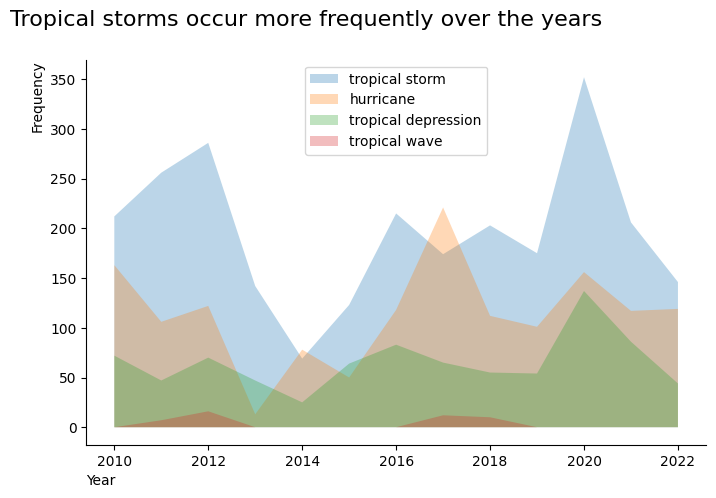

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

for value in status_values:
    tmp = df_storms[df_storms["status"]==value]
    ax.fill_between(tmp["year"], tmp["n"], label=value, alpha=0.3)

ax.spines[['right', 'top']].set_visible(False) 
ax.set_ylabel("Frequency", loc="top")
ax.set_xlabel("Year", loc="left")

fig.suptitle(t="Tropical storms occur more frequently over the years", x=0.4, y=0.98, size=16)
plt.legend()
plt.show()

In [9]:
tmp = pd.pivot(df_storms, index="year", columns="status", values="n").reset_index()
tmp.head(2)

status,year,hurricane,tropical depression,tropical storm,tropical wave
0,2010,163.0,72.0,212.0,0.0
1,2011,106.0,47.0,256.0,7.0


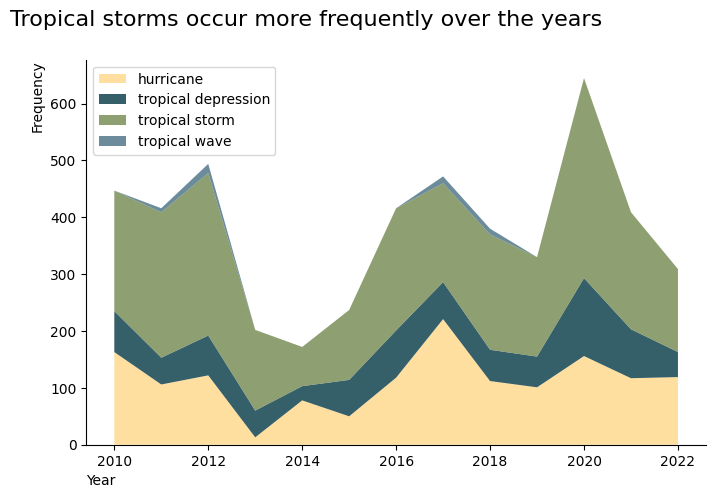

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

tmp = pd.pivot(df_storms, index="year", columns="status", values="n").reset_index()
ax.stackplot(tmp["year"], tmp["hurricane"], tmp["tropical depression"], tmp["tropical storm"], tmp["tropical wave"], alpha=0.8, 
             labels=["hurricane", "tropical depression", "tropical storm", "tropical wave"], 
             colors = ["#FED789", "#023743", "#72874E", "#476F84"])

ax.spines[['right', 'top']].set_visible(False) 
ax.set_ylabel("Frequency", loc="top")
ax.set_xlabel("Year", loc="left")

fig.suptitle(t="Tropical storms occur more frequently over the years", x=0.4, y=0.98, size=16)
plt.legend()
plt.show()

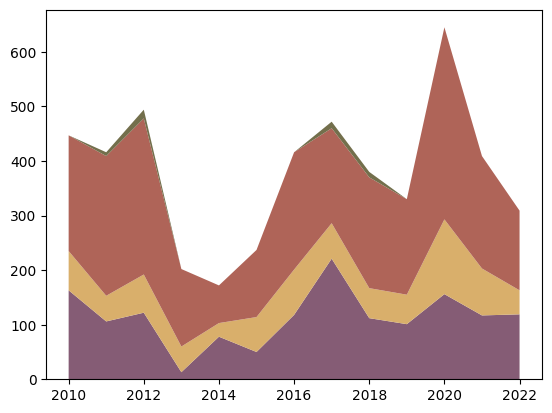

In [11]:
pivot_df = df_storms.pivot_table(
   index='year', # year is now the index
   columns='status', # column are the kind of storm
   values='n' # df content is taken from the 'n' column
)
values = [
   pivot_df[status] for status in df_storms["status"].unique()
]
cmap = load_cmap("Antique")
colors = ["#FED789", "#023743", "#72874E", "#476F84"]

fig, ax = plt.subplots()
ax.stackplot(pivot_df.index, values, colors=cmap.colors)
plt.show()

In [12]:
tmp_data = pd.pivot(df_storms,index="year", columns="status", values=["n"] )
#tmp_data.columns = tmp_data.columns.droplevel(0)

#Collapse the MultiIndex
tmp_data.columns = tmp_data.columns.map('_'.join).str.strip()
#Reset Index to get the Name column back
tmp_data = tmp_data.reset_index()
tmp_data.index = tmp_data.year
tmp_data.drop(columns=["year"], axis=1, inplace=True)
tmp_data.head()

,n_hurricane,n_tropical depression,n_tropical storm,n_tropical wave
year,,,,
2010,163.0,72.0,212.0,0.0
2011,106.0,47.0,256.0,7.0
2012,122.0,70.0,286.0,16.0
2013,13.0,47.0,142.0,0.0
2014,78.0,25.0,69.0,0.0


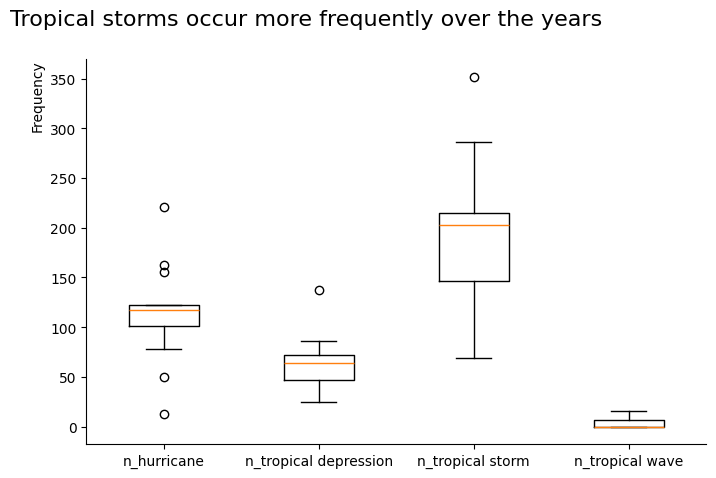

In [13]:
# You can use the column headings from the data frame as labels
labels = list(tmp_data.columns)
# A data frame needs to be converted into an array before it can be plotted this way
tmp_data = np.array(tmp_data)

fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(tmp_data, tick_labels=labels)
ax.spines[['right', 'top']].set_visible(False) 

ax.set_ylabel("Frequency", loc="top")

fig.suptitle(t="Tropical storms occur more frequently over the years", x=0.4, y=0.98, size=16)

plt.show()

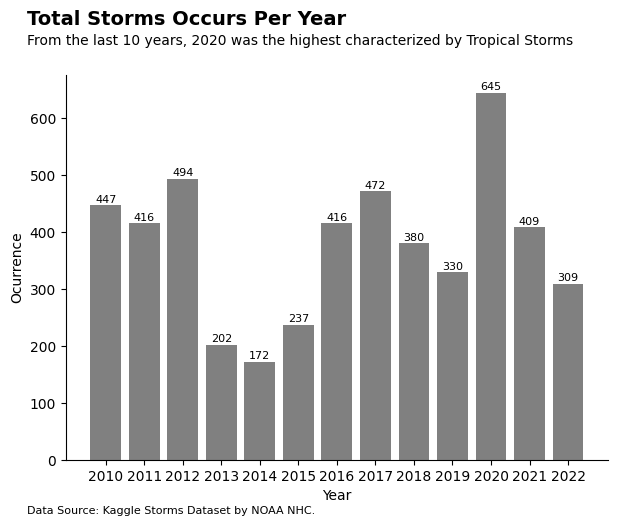

In [14]:
year_agg = df_storms.groupby(by=['year'], as_index=False).agg(
    totaltimesperyear=('n', 'sum')
)

x = year_agg['year']
y = year_agg['totaltimesperyear']

fig, ax = plt.subplots(
    figsize=(7,5)
    )

ax.bar(x, y, color='grey')

for i, value in enumerate(y):
    ax.text(x[i], value + 5, str(int(value)), ha='center', fontsize=8)

fig.text(0.07, 0.98, 'Total Storms Occurs Per Year', fontsize=14, weight='bold')
fig.text(0.07, 0.94, 'From the last 10 years, 2020 was the highest characterized by Tropical Storms', fontsize=10)
fig.text(0.07, 0.001, 'Data Source: Kaggle Storms Dataset by NOAA NHC.', fontsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Year')
plt.ylabel('Ocurrence')

plt.xticks(x)

plt.show()

# 2. Life Expectancy

# 3. Footprint

/var/folders/f3/w2fmvqr108v8svw61xkgnwcw0000gn/T/ipykernel_47339/2966492023.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('RdYlBu_r')


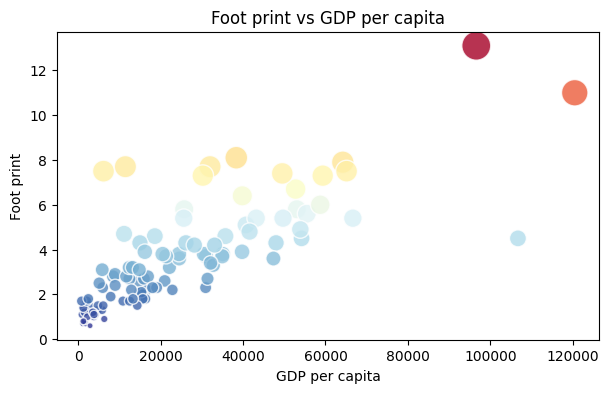

In [16]:
fig, ax = plt.subplots(figsize=(7, 4))
cm = plt.cm.get_cmap('RdYlBu_r')

scale = 50

ax.scatter(
    x=df_footprint["gdpCapita"],
    y=df_footprint["footprint"],
    s=scale*df_footprint["earthsRequired"],
    label="Earths required (proportional size)",
    c=scale*df_footprint["earthsRequired"],
    cmap=cm,
    alpha=0.8,
    edgecolors="white",
    linewidth=1,
)

ax.set_title("Foot print vs GDP per capita")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Foot print")

plt.show()

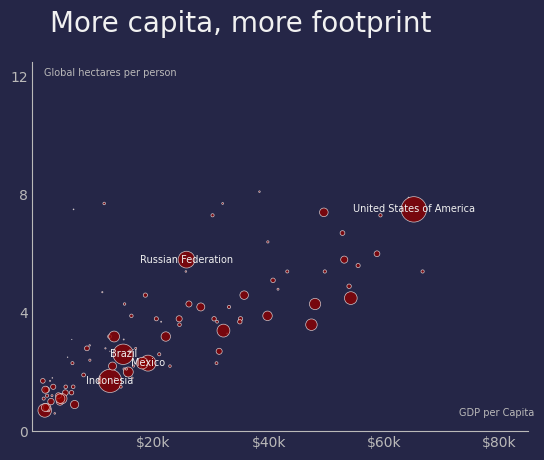

In [17]:
background_color = "#252647"
white = "#f1f1f1"
light_grey = "#bab9b9"

fig, ax = plt.subplots()
ax.scatter(df_footprint["gdpCapita"], df_footprint["footprint"], s=df_footprint["populationMillions"], 
           alpha=0.8, color="darkred", edgecolor=white, linewidth=0.5)

fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color(light_grey)
ax.tick_params(length=0)

location = [20_000, 40_000, 60_000, 80_000, 100_000]
labels = ["$20k", "$40k", "$60k", "$80k", "$100k"]
ax.set_xticks(location, labels=labels)

location = [0, 4, 8, 12]
ax.set_yticks(location, labels=location)

ax.tick_params(length=0)
ax.tick_params(
    axis="both",
    labelsize=10,
    labelcolor=light_grey,
)

ax.set_ylim(0, 12.5)
ax.set_xlim(-1000, 85_000)

subset = df_footprint[df_footprint["populationMillions"] > 100]
# Names of countries with population > 100M
for i, row in subset.iterrows():
    country = row["country"]
    x_value = row["gdpCapita"]
    y_value = row["footprint"]
    ax.text(
        x=x_value,
        y=y_value,
        s=country,
        ha="center",
        va="center",
        color=white,
        size=7,
    )

ax.text(
    x=2000,
    y=13.5,
    s="More capita, more footprint",
    size=20,
    color=white,
)

ax.text(
    x=73_000,
    y=0.5,
    s="GDP per Capita",
    color=light_grey,
    size=7,
)
ax.text(
    x=1000,
    y=12,
    s="Global hectares per person",
    color=light_grey,
    size=7,
)

plt.show()

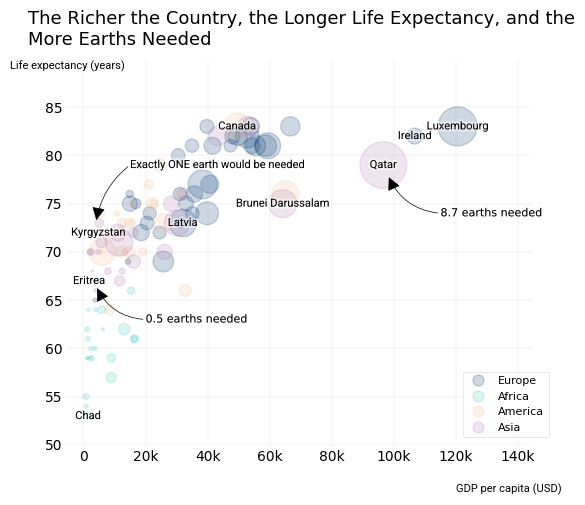

In [18]:



# Define conditions and choices for region_final
conditions = [
    df_footprint['region'].isin(["EU-27", "Other Europe"]),
    df_footprint['region'].isin(["North America", "South America", "Central America/Caribbean"]),
    df_footprint['region'].isin(["Asia-Pacific", "Middle East/Central Asia"])
]
choices = ["Europe", "America", "Asia"]
df_footprint['region_final'] = np.select(conditions, choices, default = df_footprint['region'])

# Define colors
cat_5_main_1 = "#083d77" # yale blue
cat_5_main_2 = "#4ecdc4" # robin egg blue
cat_5_main_3 = "#f4c095" # peach
cat_5_main_4 = "#b47eb3" # african violet
cat_5_main_5 = "#ffd5ff"
COLORS = [cat_5_main_1, cat_5_main_2, cat_5_main_3, cat_5_main_4, cat_5_main_5]
# Map regions to colors
REGION_COLORS = {region: color for region, color in zip(df_footprint['region_final'].unique(), COLORS)}

# Plotting
#plt.rcParams['font.family'] = 'Carlito'



fig, ax = plt.subplots(figsize=(6, 5))

for region, color in REGION_COLORS.items():
    idxs = df_footprint['region_final'] == region
    ax.scatter(
        df_footprint.loc[idxs, "gdpCapita"], 
        df_footprint.loc[idxs, "lifexp"], 
        # size is squared of earthsRequired
        s = (df_footprint.loc[idxs, "earthsRequired"]**2)*15,
        c = color, 
        alpha = 0.2, 
        label = region
    )


# Create custom legend handles with consistent marker sizes
handles, labels = ax.get_legend_handles_labels()
custom_handles = [
    plt.Line2D([0], [0],
    marker = 'o', 
    color = 'w', 
    markerfacecolor = color, 
    markeredgecolor = color,
    markersize = 8,
    alpha = 0.2)
    for color in REGION_COLORS.values()
]

# Add the legend with custom handles
legend = ax.legend(custom_handles, REGION_COLORS.keys(), loc = (0.85, 0.02), prop={'size': 8})
# Modify the legend's frame
legend.get_frame().set_linewidth(0.5)  # Set border width to 2 points
legend.get_frame().set_edgecolor('lightgrey')  # Set border color to red

# Top 5 earths required 
top_5_earths = df_footprint.sort_values("earthsRequired", ascending = False).tail(5)
countries = ["Qatar", "Ireland", "Luxembourg", "Latvia", "Brunei Darussalam", "Eritrea", "Kyrgyzstan", "Chad", "Canada"]
df_countries = df_footprint[df_footprint['country'].isin(countries)]
# Add to bubble with text 
for index, row in df_countries.iterrows():
    ax.text(
        row["gdpCapita"], 
        row["lifexp"], 
        f"{row['country']}", 
        ha = 'center', 
        va = 'center', 
        fontsize = 8, 
        color = 'black', 
        path_effects = [path_effects.withStroke(linewidth = 3, foreground = 'white', alpha = 0.5)],
        font = font_roboto,
    )

    

# X-axis to K labels, following the scales::format number-ish function in R
def format_number_general(num, tick_position):    
    """
    Format a number for a matplotlib axis label.
    
    Parameters
    ----------
    num : float
        the number to format
    tick_position : int
        The position of the tick in question. This is used to determine
        whether to use scientific notation or not.
    
    Returns
    -------
    str
        a string representation of the number, formatted according to
        the following rules:
        
        - if the number is >= 1e12, use T (tera)
        - if the number is >= 1e9, use B (billion)
        - if the number is >= 1e6, use M (million)
        - if the number is >= 1e3, use k (thousand)
        - if the number is not an integer, use regular formatting
        - if the number is an integer, use integer formatting
    """
    suffixes = {
        'k': 1e3,
        'M': 1e6,
        'B': 1e9,
        'T': 1e12
    }
    
    for suffix, value in reversed(list(suffixes.items())):
        if num >= value:
            return f"{num / value:.1f}{suffix}".replace(".0" + suffix, suffix)
    
    return str(int(num)) if num.is_integer() else str(num)

formatter = FuncFormatter(format_number_general)
ax.xaxis.set_major_formatter(formatter)

# Titles and axes labels
fig.suptitle(
    "The Richer the Country, the Longer Life Expectancy, and the More Earths Needed",
    wrap = True,
    fontsize = 13,
    horizontalalignment = 'left',
    x = 0.06)
ax.text(0, 1, "Life expectancy (years)", ha = 'center', va = 'top', fontsize = 8, transform = ax.transAxes, font=font_roboto)
ax.text(0.95, -0.1, "GDP per capita (USD)", ha = 'center', va = 'top', fontsize = 8, transform = ax.transAxes, font = font_roboto)

# Customize a bit the plot (grid and axis )
## spines and ticks removal
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='x', which='both', length=0)  
ax.tick_params(axis='y', which='both', length=0) 
## limits
max_y = max(df_footprint['lifexp']) * 1.07
ax.set_ylim(50, max_y)
ax.set_xlim(right = max(df_footprint['gdpCapita']) * 1.2)
## grid
ax.set_axisbelow(True)
ax.grid(color ='lightgrey', linestyle = '-', linewidth = 0.2)


# add arrows for Eritrea
ax_arrow(
    head_position = (4000, 66.5),
    tail_position = (20000, 63),
    width = 0.5,
    radius = -0.3,
    color = "black",
    fill_head = "False"
)
txt_arrow = str(round(df_countries[df_countries["country"] == "Eritrea"]["earthsRequired"].values[0], 1)) + " earths needed"
ax.text(20000, 63, txt_arrow, ha = 'left', va = 'center', fontsize = 8,
    path_effects = [path_effects.withStroke(linewidth = 3, foreground = 'white', alpha = 0.5)])

# add arrows for Qatar
ax_arrow(
    head_position = (98000, 78),
    tail_position = (115000, 74),
    width = 0.5,
    radius = -0.3,
    color = "black",
    fill_head = "False"
)
txt_arrow = str(round(df_countries[df_countries["country"] == "Qatar"]["earthsRequired"].values[0], 1)) + " earths needed"
ax.text(115000, 74, txt_arrow, ha = 'left', va = 'center', fontsize = 8,
    path_effects = [path_effects.withStroke(linewidth = 3, foreground = 'white', alpha = 0.5)])

# add arrows for Kyrgyzstan
ax_arrow(
    head_position = (4000, 73),
    tail_position = (15000, 79),
    width = 0.5,
    radius = 0.2,
    color = "black",
    fill_head = "False"
)
txt_arrow = "Exactly ONE earth would be needed"
ax.text(15000, 79, txt_arrow, ha = 'left', va = 'center', fontsize = 8,
    path_effects = [path_effects.withStroke(linewidth = 3, foreground = 'white', alpha = 0.5)], font= font_roboto)

plt.show()


# save plot to svg and png (300PPI)
#fig.savefig("module1-project-p1.svg", dpi = 300)
#fig.savefig("module1-project-p1.png", dpi = 600)


# Projects

## Disasters

In [20]:
from pyfonts import load_font
font = load_font(font_url="https://github.com/google/fonts/blob/main/ofl/roboto/Roboto%5Bwdth%2Cwght%5D.ttf?raw=true")


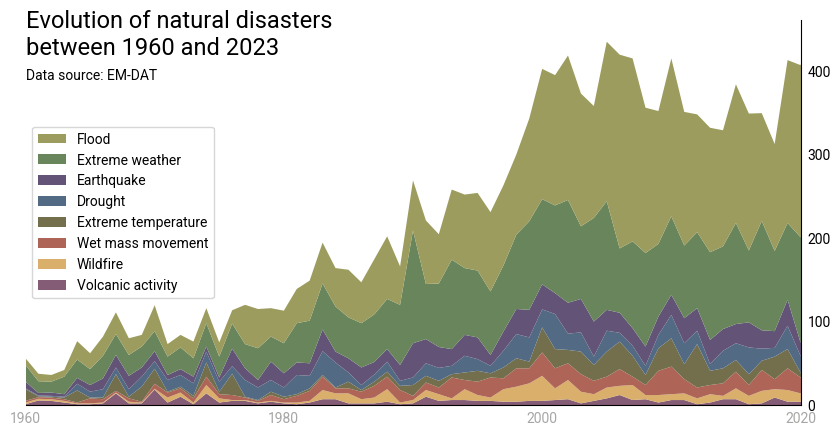

In [21]:
from matplotlib.font_manager import FontProperties

#font = FontProperties(fname="https://github.com/google/fonts/blob/main/ofl/roboto/Roboto%5Bwdth%2Cwght%5D.ttf?raw=true")

columns = df_disasters.drop(columns="Year").sum().sort_values().index.to_list()
x = df_disasters["Year"]
y = np.stack(df_disasters[columns].values, axis=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.text(
   x=1960,
   y=420,
   s="Evolution of natural disasters\nbetween 1960 and 2023",
   size=17,
   #fontproperties=font
   font = font
)

ax.text(x=1960, y=390, s="Data source: EM-DAT", size=10, fontproperties=font)

# Axis Y to the right
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

cmap = load_cmap("Antique")

location = [1960, 1980, 2000, 2020]
labels = ["1960", "1980", "2000", "2020"]
ax.set_xticks(location)
ax.set_xticklabels(labels, color='#A6A6A5')

ax.stackplot(x, y, colors=cmap.colors, labels=columns)

ax.set_xlim(1960, 2020)
ax.spines[["top", "left"]].set_visible(False)
ax.tick_params(length=0, pad=5)

ax.legend(reverse=True, loc="center left", fontsize=10, prop=font)

ax.title.set_fontproperties(font)
ax.xaxis.label.set_fontproperties(font)
ax.yaxis.label.set_fontproperties(font)


# Apply the font to all text elements in the figure
for label in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_legend().get_texts()):
   label.set_fontproperties(font)

plt.show()

## Neighborhood

In [22]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/newyork-airbnb/newyork-airbnb.csv"
df_neigh = pd.read_csv(url)

df_neigh.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [23]:
df_agg = (
    df_neigh["neighbourhood"]
    .value_counts()
    .head(10)
    .to_frame(name="count")
    .reset_index()
    .rename(columns={"index": "neighbourhood"})
    .sort_values("count")
)
labels = df_agg["neighbourhood"]
values = df_agg["count"]

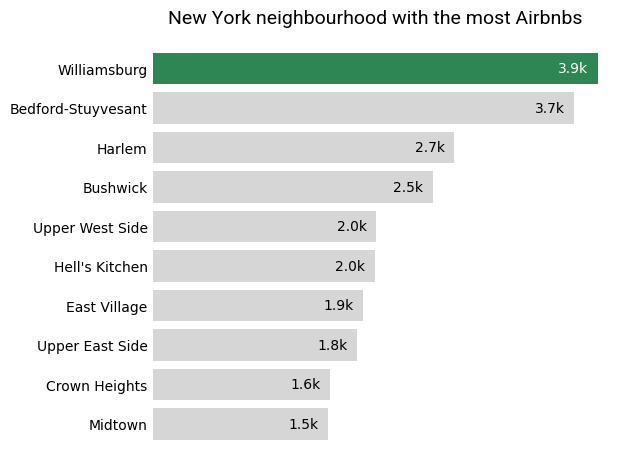

In [24]:
fig, ax = plt.subplots(layout="tight")

color_mapping = {True: "#2d8653", False: "#d6d6d6"}
colors = (labels == "Williamsburg").map(color_mapping)

ax.barh(labels, values, color=colors)
ax.set_xticks([])
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.tick_params(length=0)

ax.text(
   x=3920 / 2,
   y=10.5,
   s="New York neighbourhood with the most Airbnbs",
   ha="center",
   va="top",
   size=14,
   font = font
)
   
for i in range(len(values)):
   value = values[i]
   if i == 0:
      color = "white"
   else:
      color = "black"
   format_value = f"{value / 1000:.1f}k"
   ax.text(
      x=value - 350, y=len(values) - 1 - i, s=format_value, va="center", color=color
   )

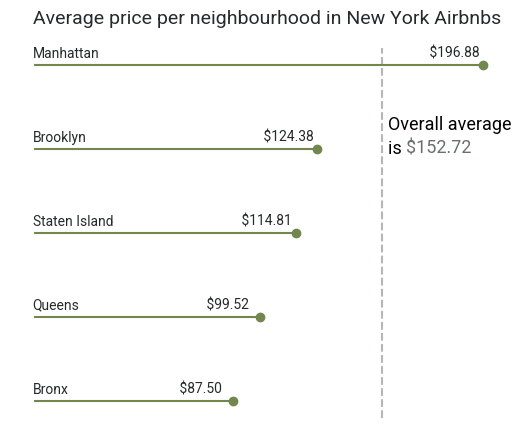

In [25]:
avg_global = df_airbnb["price"].mean()

df_agg = (
  df_airbnb.groupby("neighbourhood_group", as_index=False)["price"]
  .mean()
  .sort_values("price")
  .reset_index()
)

x = df_agg["price"]
y = df_agg["neighbourhood_group"]
color = "#27292A"

fig, ax = plt.subplots()

ax.spines[["top","right", "left", "bottom" ]].set_visible(False)
# plot a horizontal line at the average price
ax.axvline(x=avg_global, color="#68706F", linestyle="--", linewidth=1.5, alpha=0.5)

ax.stem(y, x, orientation="horizontal", basefmt="white", linefmt="#72874E")


ax.text(
  x=0,
  y=4.5,
  s="Average price per neighbourhood in New York Airbnbs",
  size=14,
  color = color,
  font = font_roboto
)
#ax.text(x=155, y=3.4, s=f"Overall average \nis ${avg_global:.2f}", font = font_roboto)
ax_text(
  x=155, y=3.4, s=f"Overall average\nis <${avg_global:.2f}>", ax=ax, size=13,font=font_roboto,
  highlight_textprops=[
    {"color": "#68706F", "weight": "bold", "font":font_roboto},
  ],
)

ax.tick_params(length = 0, labelbottom = False, labelleft = False)

for i, row in df_agg.iterrows():
  ax.text(
    x = row['price'] - 25,
         y = i + 0.1,
         s = f" ${row['price']:.2f}" , 
    color = color, font = font_roboto,
  )
  ax.text(
    x = 0,
         y = i + 0.1,
         s = row['neighbourhood_group'],
    color = color, font =font_roboto
  )


plt.show()

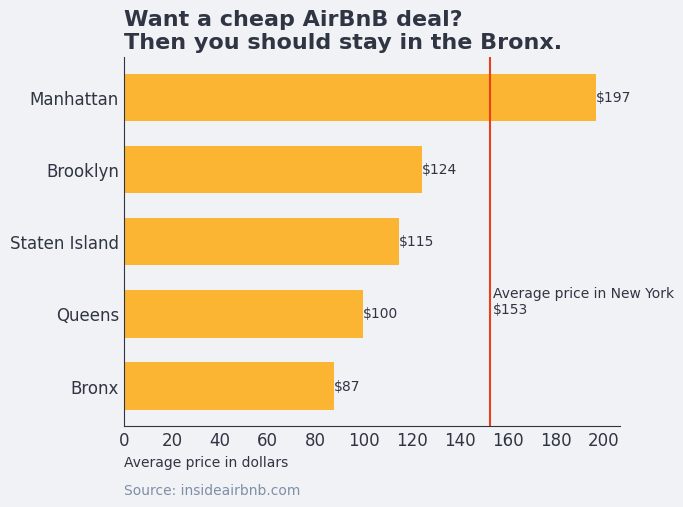

In [26]:
background_color = "#f1f2f6"
grey = "#2f3542"
color = "#fcb433"

avg_global = df_airbnb["price"].mean()

df_agg = (
    df_airbnb.groupby("neighbourhood_group", as_index=False)["price"]
    .mean()
    .sort_values("price")
    .reset_index()
)

x = df_agg["price"]
y = df_agg["neighbourhood_group"]

fig, ax = plt.subplots()

bars = ax.barh(y=y, width=x, color=color, height=0.66)
ax.set_xticks(list(range(0, 201, 20)))


ax.set_title(
    "Want a cheap AirBnB deal?\nThen you should stay in the Bronx.",
    loc="left",
    size=16,
    color=grey,
    fontweight="bold"
)

ax.set_xlabel("Average price in dollars", loc="left", color=grey)

ax.tick_params(length=0)
ax.tick_params(
    labelsize=12,
    labelcolor=grey,
)

ax.axvline(avg_global, color="#e84118")
ax.text(
    x=avg_global + 1,
    y=1,
    s=f"Average price in New York\n${round(avg_global)}",
    color=grey,
)
ax.spines[["left", "bottom"]].set_color(grey)
sns.despine()

ax.set_facecolor(background_color)
ax.bar_label(
    bars, labels=[f"${round(value)}" for value in x], label_type="edge", color=grey
)
ax.text(x=0, y=-1.5, s="Source: insideairbnb.com", color="#7f8fa6")

fig.set_facecolor(background_color)

#fig.tight_layout()  # this ensures the figure fits the sandbox



## Wine

In [27]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/wine/wine.csv"
df = pd.read_csv(url)

df_agg = df.groupby("quality", as_index=False).median()
df_agg.head()

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,3,11.1,0.9900,1.02,43.700,0.256,177.30,289.4,1.01701,3.11,1.24,11.6
1,4,10.9,0.9600,0.99,42.400,0.251,172.00,278.8,1.01631,3.12,1.23,11.6
2,5,7.6,0.4425,0.38,7.800,0.072,40.00,155.0,0.99730,3.18,0.56,10.0
3,6,7.0,0.2800,0.32,3.725,0.047,31.00,121.0,0.99492,3.21,0.52,10.5
4,7,9.7,0.7600,0.81,35.000,0.191,135.95,226.1,1.01097,3.16,1.03,11.7


In [28]:
font = load_font(font_url="https://github.com/google/fonts/blob/main/ofl/lato/Lato-SemiBold.ttf?raw=true")
font_light = load_font(font_url="https://github.com/google/fonts/blob/main/ofl/lato/Lato-Light.ttf?raw=true")

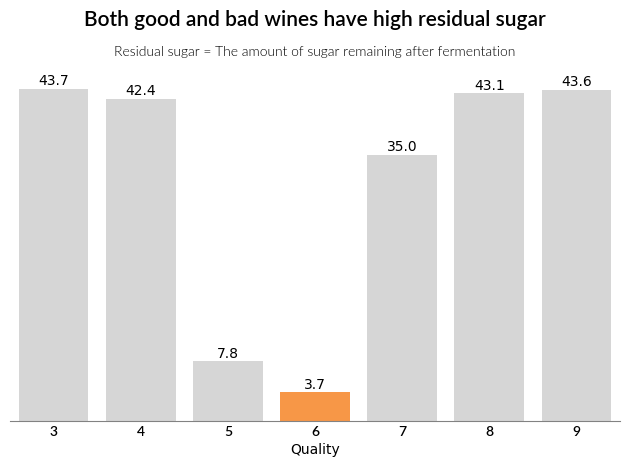

In [29]:
fig, ax = plt.subplots(layout="tight")

color_mapping = {True: '#F79747', False: "#d6d6d6"}
colors = (df_agg["quality"] == 6).map(color_mapping)


ax.bar(
  df_agg["quality"],
  df_agg["residual_sugar"],
  color=colors,
)

ax.set_xlabel("Quality")
#ax.set_ylabel("Residual Sugar")
ax.set_yticks([])
ax.text(
  x=6,
  y=52,
  s="Both good and bad wines have high residual sugar",
  size=15,
  ha="center",
  font = font
)
ax.text(
  x=6,
  y=48,
  s="Residual sugar = The amount of sugar remaining after fermentation",
  size=10,
  #color="red",
  ha="center",
  font = font_light
)

ax.spines[["top", "right", "left"]].set_visible(False)
ax.spines["bottom"].set_color('#828282')
ax.tick_params(axis="both", length=0,)


for i, row in df_agg.iterrows():
    country = round(row["residual_sugar"], 1)
    x_value = row["quality"]
    y_value = row["residual_sugar"] +1
    ax.text(
        x=x_value,
        y=y_value,
        s=country,
        ha="center",
        va="center",
        color="black",
        size=10,
    )
ax.set_xlim(2.5, 9.5)
# Apply the font to all text elements in the figure
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
   label.set_fontproperties(font)

plt.show()

# 4. Random

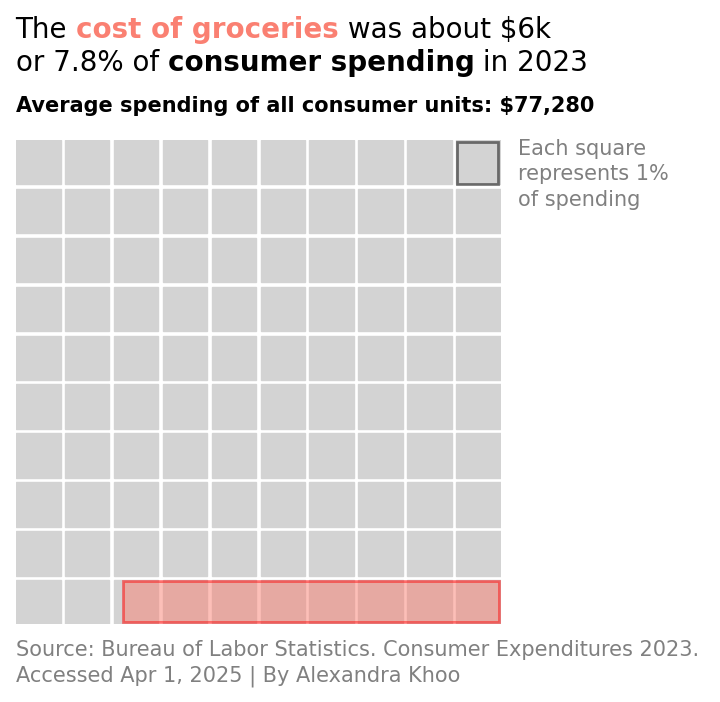

In [30]:
from pywaffle import Waffle
import matplotlib.patches as patches
from highlight_text import fig_text


fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

values = [100]

Waffle.make_waffle(
  rows=10,
  columns=10,
  values=values,
  interval_ratio_x=0.1,
  interval_ratio_y=0.1,
  colors = ["lightgrey"],
  ax =ax)

# Create a Rectangle patch
rect = patches.Rectangle((0.22, 0.004), 
                         0.776, 0.085, 
                         linewidth=2, 
                         edgecolor='red', 
                         facecolor='salmon', 
                         alpha = 0.5)

rect2 = patches.Rectangle((0.91, 0.91), 
                         0.085, 0.085, 
                         linewidth=2, 
                         edgecolor='black', 
                         facecolor='none', 
                         alpha = 0.5)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect2)


x0, y0, width, height = ax.get_position().bounds


fig_text(
  x=x0 - 0.05,
  y=y0 + height,
  s="The <cost of groceries> was about $6k \nor 7.8% of <consumer spending> in 2023",
  size=20,
  highlight_textprops=[
      {"color": "salmon", "weight": "bold"},
      {"color": "black", "weight": "bold"},
  ],
)

fig_text(
  x =x0 -0.05,
  y= y0 + height - 0.1,
  s ="<Average spending of all consumer units: $77,280>",
  size = 15,
  highlight_textprops=[
    {"color": "black", "weight": "bold"}],
)

plt.tight_layout(rect=[0, 0.1, 1, 0.75]) 

fig_text(
  x =x0 + width*0.75,
  y= y0 + height*0.8,
  s ="Each square \nrepresents 1% \nof spending",
  size = 15,
  color = "grey"
)

fig_text(
  x =x0 - 0.05,
  y= y0 - 0.01,
  s ="Source: Bureau of Labor Statistics. Consumer Expenditures 2023. \nAccessed Apr 1, 2025 | By Alexandra Khoo",
  size = 15,
  color = "grey"
)

plt.show()

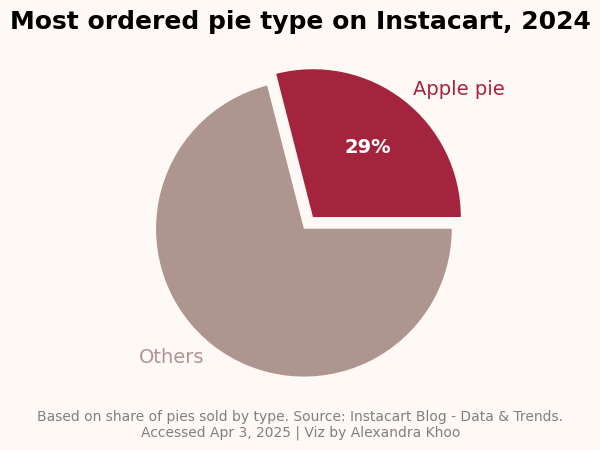

In [31]:
labels = ['Apple pie', 'Others']

sizes = [29, 71]

colors = ['#A5243D','#AF9590']
fig, ax = plt.subplots()

def getVal(size):
  if size == sizes[0]:
    return f'{sizes[0]}%'
  else:
    return ''

patches, texts, pcts = ax.pie(sizes, 
      labels = labels,
      explode=[0.05, 0.05],
      autopct=getVal,
      textprops={'size': 14},
      colors = colors)

plt.setp(pcts, color='white', fontweight='bold')

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

x0, y0, width, height = ax.get_position().bounds

fig.text(
  x =0.5,
  y= 0.9,
  s ="Most ordered pie type on Instacart, 2024",
  size = 18,
  color = "black",
  fontweight = "bold",
  ha = "center"
)


fig.text(
  x = 0.5,
  y= 0.05,
  s ="Based on share of pies sold by type. Source: Instacart Blog - Data & Trends.\nAccessed Apr 3, 2025 | Viz by Alexandra Khoo",
  size = 10,
  color = "grey",
  ha = "center")

ax.set_facecolor('#FFF9F5')
fig.set_facecolor('#FFF9F5')

plt.show()

/var/folders/f3/w2fmvqr108v8svw61xkgnwcw0000gn/T/ipykernel_47339/2529122034.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pct_change_sorted[i] < 1:
/var/folders/f3/w2fmvqr108v8svw61xkgnwcw0000gn/T/ipykernel_47339/2529122034.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif pct_change_sorted[i] > 10:


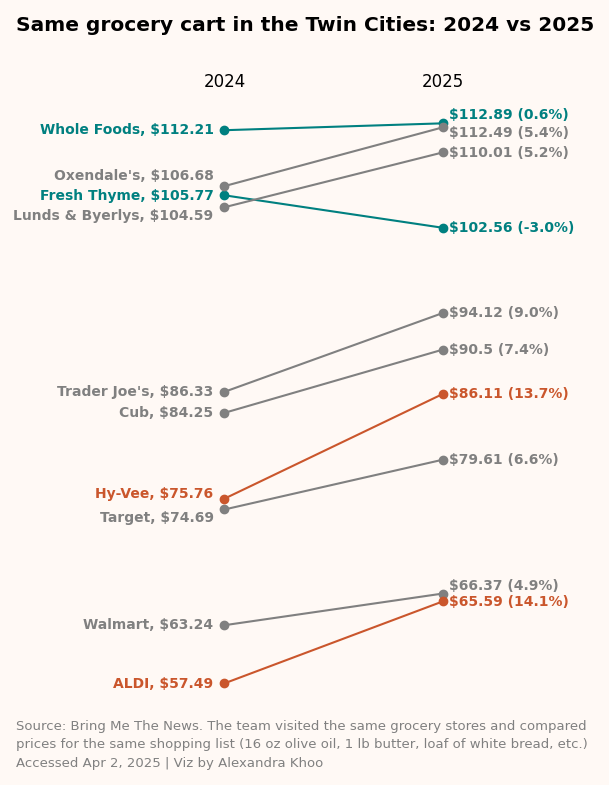

In [32]:
df = pd.DataFrame(
    [[57.49, 65.59],
     [63.24, 66.37],
     [74.69, 79.61],
     [75.76, 86.11],
     [84.25, 90.50],
     [86.33, 94.12],
     [105.77, 102.56],
     [104.59, 110.01],
     [106.68, 112.49],
     [112.21, 112.89],
     [130.81, 136.80],
     [135.17, 140.76]],
    index = ['ALDI',
             'Walmart',
             'Target',
             'Hy-Vee',
             'Cub',
             "Trader Joe's",
             "Fresh Thyme",
             "Lunds & Byerlys",
             "Oxendale's",
             "Whole Foods",
             "Kowalski's",
             "Mississippi Market"],
    columns = [2024,2025]
)


df = df.sort_values(by = 2024).head(10)


pct_change = round(100*(df[2025]-df[2024])/df[2024],1)

pct_change_sorted = pct_change.sort_values()

# Custom colors categories: 3 buckets (low, mid, higher)

cmap = load_cmap('Geyser')
colors = cmap(np.linspace(0, 1, 3)) 


color_map = {}
for i, shop in enumerate(pct_change_sorted.index):
  if pct_change_sorted[i] < 1:
    color_map[shop] = colors[0]
  elif pct_change_sorted[i] > 10:
    color_map[shop] = colors[2]
  else:
       color_map[shop] = "grey"


years = df.columns

fig, ax = plt.subplots(figsize = (6,8))

plt.subplots_adjust(left=0.35, right = 0.75)

for shop in pct_change_sorted.index:
  if shop == "Oxendale's":
    y1 = 1
    y2 = -0.5
  elif shop == "Hy-Vee":
    y1 = 0.5
  elif shop in ["Lunds & Byerlys", "Target"]:
    y1 = -0.8
    y2 = 0
  elif shop  == "Whole Foods":
    y1 = 0
    y2 = 0.8
  elif shop  == "Walmart":
    y2 = 0.8
  else:
    y1 = 0
    y2 = 0

  ax.plot(years, df.loc[shop], marker = 'o', color = color_map[shop])
  
  ax.text(
        2024 - 0.05,
        df.loc[shop, 2024] + y1,
        s = f'{shop}, ${df.loc[shop, 2024]}',
        fontsize = 10,
      va = "center",
      ha = "right",
    color = color_map[shop],
      fontweight = "bold"
    )

  ax.text(
        2025 + 0.03,
        df.loc[shop, 2025] + y2,
        s = f'${df.loc[shop, 2025]} ({pct_change.loc[shop]}%)',
        fontsize = 10,
        va = "center",
    color = color_map[shop],
      fontweight = "bold"
    )

  

ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.tick_params(length = 0,
              top=True,
              labeltop=True,
              bottom=False,
              labelbottom=False, labelsize = 12)

ax.set_xticks(years)
ax.set_yticklabels("")
x0, y0, width, height = ax.get_position().bounds

fig_text(
  x =0.02,
  y= y0 + height + 0.1,
  s ="Same grocery cart in the Twin Cities: 2024 vs 2025",
  size = 14.5,
  color = "black",
  fontweight = "bold"
)

fig_text(
  x = 0.02,
  y= y0 - 0.01,
  s ="Source: Bring Me The News. The team visited the same grocery stores and compared\nprices for the same shopping list (16 oz olive oil, 1 lb butter, loaf of white bread, etc.)\nAccessed Apr 2, 2025 | Viz by Alexandra Khoo",
  size = 9.5,
  color = "grey")


ax.set_facecolor('#FFF9F5')
fig.set_facecolor('#FFF9F5')

plt.show()


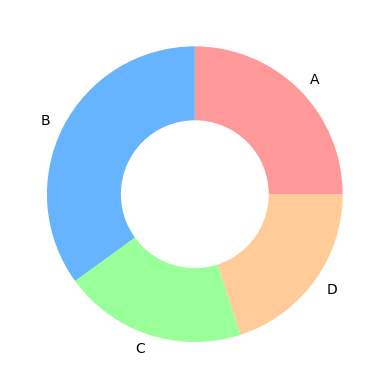

In [33]:
sizes = [25, 35, 20, 20]
labels = ["A", "B", "C", "D"]
colors = ["#ff9999","#66b3ff","#99ff99","#ffcc99"]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors)
ax.pie([1], colors="white", radius=0.5)
plt.show()

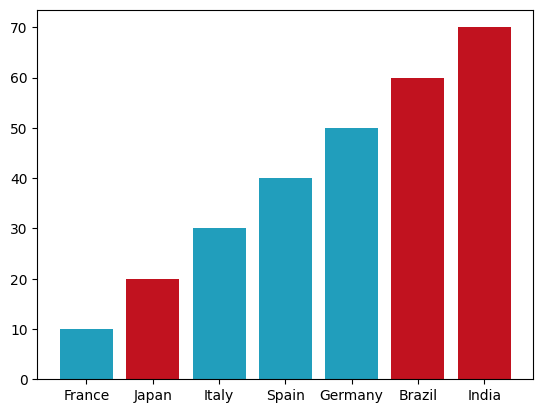

In [34]:
y = [10, 20, 30, 40, 50, 60, 70]
labels = [
   "France", "Japan", "Italy", "Spain",
   "Germany", "Brazil", "India"
]
continents = [
   "Europe", "Asia", "Europe", "Europe",
   "Europe", "South America", "Asia"
]

blue = "#219ebc"
red = "#c1121f"
colors = [
   blue if continent == "Europe" else red
   for continent in continents
]

fig, ax = plt.subplots()
ax.bar(labels, y, color=colors)
plt.show()


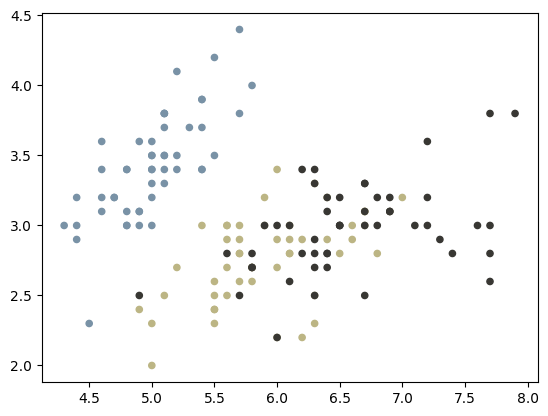

In [35]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/refs/heads/master/static/data/iris.csv"
iris = pd.read_csv(url)

x = iris["sepal_length"]
y = iris["sepal_width"]
c = pd.Categorical(iris["species"]).codes

cmap = load_cmap("Alosa_fallax")

fig, ax = plt.subplots()
ax.scatter(x, y, c=c, cmap=cmap, s=20)
plt.show()

In [36]:
#pip install geopandas

In [37]:

# import matplotlib.pyplot as plt
# import pandas as pd
# import geopandas as gpd
# import contextily as cx

# url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/newyork-airbnb/newyork-airbnb.csv"
# df = pd.read_csv(url)


# gdf = gpd.GeoDataFrame(
#     df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
# ).to_crs(epsg=3857)


# fig, ax = plt.subplots(figsize=(10, 9))

# gdf.loc[lambda x: x.neighbourhood_group == "Manhattan"].plot(
#     column="price",
#     ax=ax,
#     alpha=0.2,
#     legend=True,
#     scheme="Quantiles",
#     classification_kwds={"k": 10},
#     categorical=True,
#     markersize=5,
# )

# ax.get_legend().set_title("Price per night ($)")


# cx.add_basemap(ax, zoom=13)
# ax.axis("off")
# ax.set_title("Better Airbnb deals in the north of Manhattan")
# plt.tight_layout()


# #fig.savefig("NY_airbnb_price.png", dpi=500)

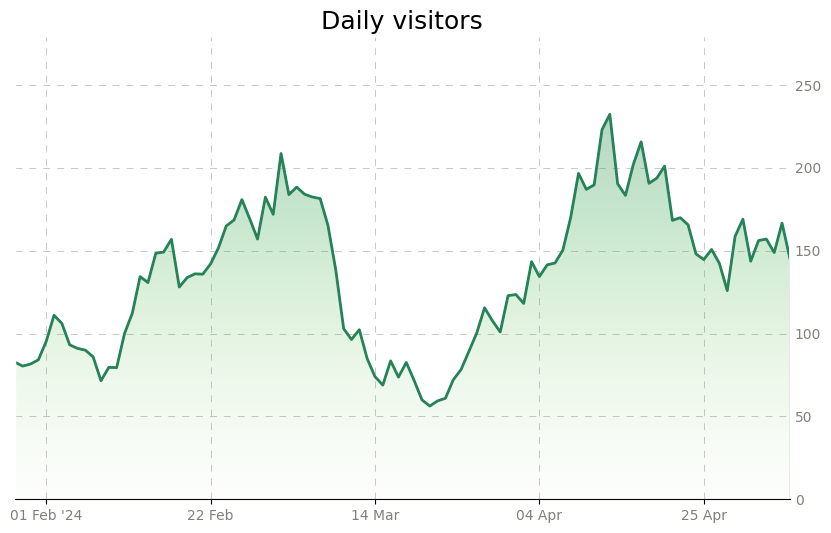

In [38]:

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib.path import Path
from matplotlib.patches import PathPatch

np.random.seed(38)

# Data generation
dates = pd.date_range(start='2024-02-01', periods=100, freq='D')
initial_rate = 75
drift = 0.003
volatility = 0.1
returns = np.random.normal(drift, volatility, len(dates))
rates = initial_rate * np.cumprod(1 + returns)

x, y = dates, rates

# General parameters
fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Daily visitors", fontsize=18, color="black")
#rcParams['font.family'] = 'DejaVu Sans'
#rcParams['font.size'] = 14

# Axis Y to the right
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# Axis
x_interval = 21
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=x_interval))

ax.yaxis.set_major_locator(ticker.MultipleLocator(50))

# Grid
ax.grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax.tick_params(axis='y', length=0)

# Add year to the first date on the axis
def custom_date_formatter(t, pos, dates, x_interval):
    date = dates[pos*x_interval]
    if pos == 0:
        return date.strftime('%d %b \'%y')  
    else:
        return date.strftime('%d %b')  
ax.xaxis.set_major_formatter(ticker.FuncFormatter((lambda x, pos: custom_date_formatter(x, pos, dates=dates, x_interval=x_interval))))

# Ticks label color
[t.set_color('#808079') for t in ax.yaxis.get_ticklabels()]
[t.set_color('#808079') for t in ax.xaxis.get_ticklabels()]


# Gradient
numeric_x = np.array([i for i in range(len(x))])
numeric_x_patch = np.append(numeric_x, max(numeric_x))
numeric_x_patch = np.append(numeric_x_patch[0], numeric_x_patch)
y_patch = np.append(y, 0)
y_patch = np.append(0, y_patch)

path = Path(np.array([numeric_x_patch, y_patch]).transpose())
patch = PathPatch(path, facecolor='none')
plt.gca().add_patch(patch)

ax.imshow(numeric_x.reshape(len(numeric_x), 1),  interpolation="bicubic",
                cmap=plt.cm.Greens, 
                origin='lower',
                alpha=0.3,
                extent=[min(numeric_x), max(numeric_x), min(y_patch), max(y_patch) * 1.2], 
                aspect="auto", clip_path=patch, clip_on=True)

# Plotting main line
y_chart = y_patch
y_chart[0] = y_chart[1]
y_chart[-1] = y_chart[-2]
ax.plot(numeric_x_patch, y_chart, color='#268358', linewidth=2)

# fix a grey line of imshow
ax.plot([max(numeric_x_patch), max(numeric_x_patch)], [0, max(y)], color='white', linewidth=2)

#plt.savefig('high_quality_plot.png', dpi=300, bbox_inches='tight')
plt.show()

## Legend and Annotation

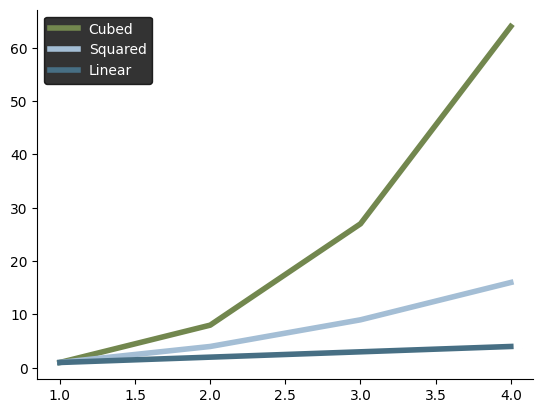

In [39]:
x = [1, 2, 3, 4]
y1 = [1, 2, 3, 4]
y2 = [1, 4, 9, 16]
y3 = [1, 8, 27, 64]
colors = ["#476F84", "#A4BED5", "#72874E"]

fig, ax = plt.subplots()

ax.plot(x, y3, label="Cubed", color=colors[2], lw=4)
ax.plot(x, y2, label="Squared", color=colors[1], lw=4)
ax.plot(x, y1, label="Linear", color=colors[0], lw=4)
ax.spines[["top", "right"]].set_visible(False)

# 3 arguments for the 3 colors: background, edge and label
ax.legend(
  facecolor="black",
  edgecolor="black",
  labelcolor="white",
)



plt.show()

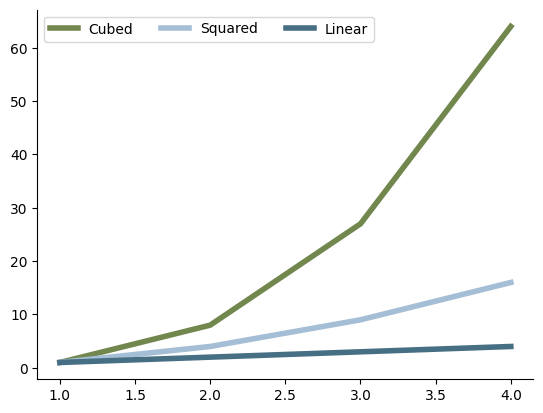

In [40]:
x = [1, 2, 3, 4]
y1 = [1, 2, 3, 4]
y2 = [1, 4, 9, 16]
y3 = [1, 8, 27, 64]
colors = ["#476F84", "#A4BED5", "#72874E"]

fig, ax = plt.subplots()

ax.plot(x, y3, label="Cubed", color=colors[2], lw=4)
ax.plot(x, y2, label="Squared", color=colors[1], lw=4)
ax.plot(x, y1, label="Linear", color=colors[0], lw=4)
ax.spines[["top", "right"]].set_visible(False)

# Change the number of columns to make it horizontal
ax.legend(ncols=3, loc="upper left")

plt.show()

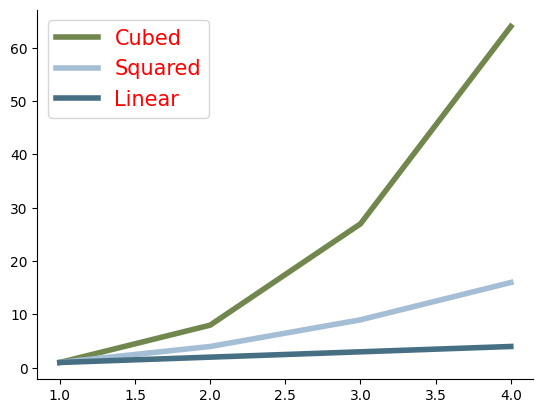

In [41]:
fig, ax = plt.subplots()

ax.plot(x, y3, label="Cubed", color=colors[2], lw=4)
ax.plot(x, y2, label="Squared", color=colors[1], lw=4)
ax.plot(x, y1, label="Linear", color=colors[0], lw=4)
ax.spines[["top", "right"]].set_visible(False)

# Legend
ax.legend(labelcolor="red", fontsize=15)

plt.show()

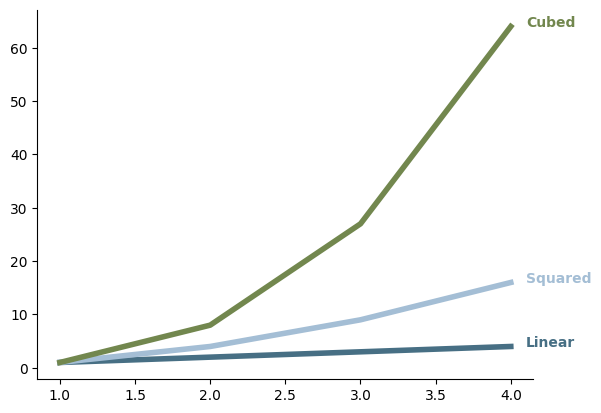

In [42]:
fig, ax = plt.subplots()

ax.plot(x, y1, color=colors[0], lw=4)
ax.plot(x, y2, color=colors[1], lw=4)
ax.plot(x, y3, color=colors[2], lw=4)
ax.spines[["top", "right"]].set_visible(False)

ax.text(
  x=4.1, y=4, s="Linear", color=colors[0], weight="bold"
)
ax.text(
  x=4.1, y=16, s="Squared", color=colors[1], weight="bold"
)
ax.text(
  x=4.1, y=64, s="Cubed", color=colors[2], weight="bold"
)
plt.show()

Text(7, 3.4, 'Virginica')

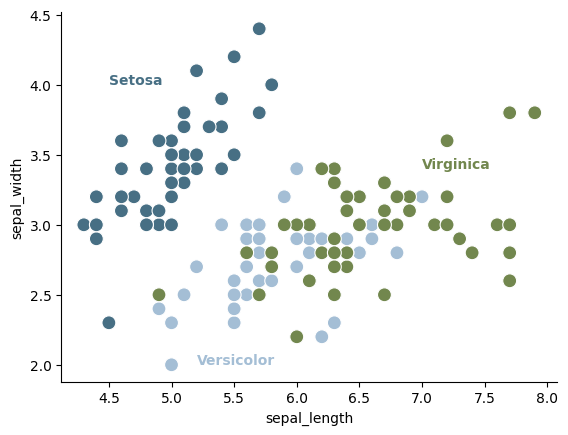

In [43]:
import seaborn as sns

url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/refs/heads/master/static/data/iris.csv"
iris = pd.read_csv(url)

colors = ["#476F84", "#A4BED5", "#72874E"]

x = iris["sepal_length"]
y = iris["sepal_width"]
c = iris["species"]

fig, ax = plt.subplots()
sns.scatterplot(
  x=x, y=y, hue=c, s=100,
  legend=False,
  palette=colors,
)
ax.spines[["top", "right"]].set_visible(False)
ax.text(x=4.5, y=4, s="Setosa", weight="bold", color=colors[0])
ax.text(x=5.2, y=2, s="Versicolor", weight="bold", color=colors[1])
ax.text(x=7, y=3.4, s="Virginica", weight="bold", color=colors[2])

Text(2023.5, 15, 'Earthquake')

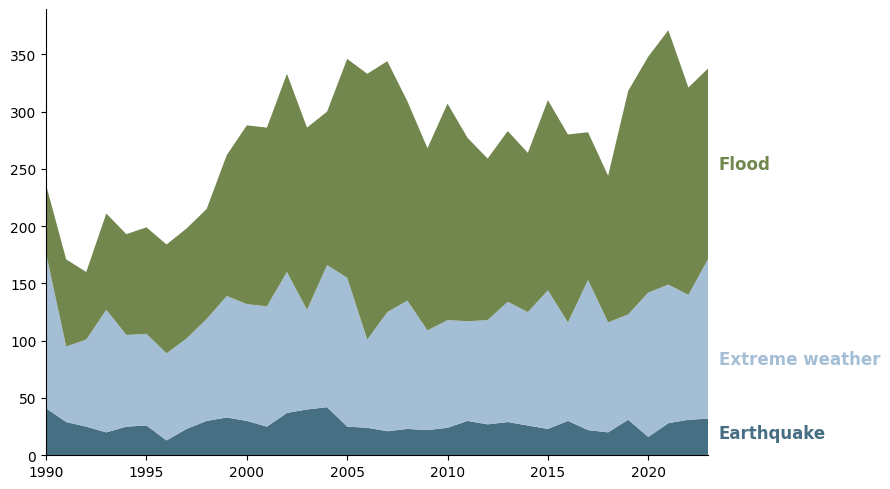

In [44]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/natural-disasters/natural-disasters.csv"
df = pd.read_csv(url)
df = df[["Year", "Flood", "Extreme weather", "Earthquake"]]
df = df[df["Year"] >= 1990]

columns = df.drop(columns="Year").sum().sort_values().index.to_list()
x = df["Year"]
y = np.stack(df[columns].values, axis=-1)

colors = ["#476F84", "#A4BED5", "#72874E"]

fig, ax = plt.subplots(figsize=(9, 5), layout="tight")

ax.stackplot(x, y, colors=colors)
ax.spines[["top", "right"]].set_visible(False)
ax.set_xlim(1990, 2023)

text_arg = dict(weight="bold", size=12)
ax.text(x=2023.5, y=250, s="Flood", color=colors[2], **text_arg)
ax.text(x=2023.5, y=80, s="Extreme weather", color=colors[1], **text_arg)
ax.text(x=2023.5, y=15, s="Earthquake", color=colors[0], **text_arg)

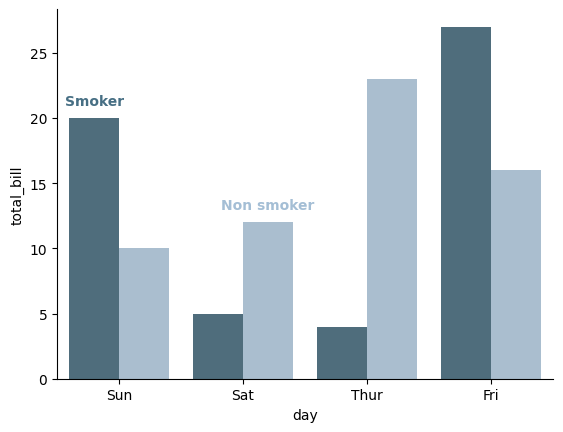

In [45]:
df = pd.DataFrame({
    "day": ["Sun", "Sun", "Sat", "Sat", "Thur", "Thur", "Fri", "Fri"],
    "total_bill": [20, 10, 5, 12, 23, 4, 27, 16],
    "smoker": ["Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No"]
})
colors = ["#476F84", "#A4BED5"]

fig, ax = plt.subplots()
sns.barplot(
  x=df["day"],
  y=df["total_bill"],
  hue=df["smoker"],
  palette=colors,
  ax=ax, legend=False
)
ax.spines[["top", "right"]].set_visible(False)

text_style = dict(ha="center", weight="bold")
ax.text(
  x=-0.2, y=21, s="Smoker", color=colors[0], **text_style
)
ax.text(
  x=1.2, y=13, s="Non smoker", color=colors[1], **text_style
)
plt.show()

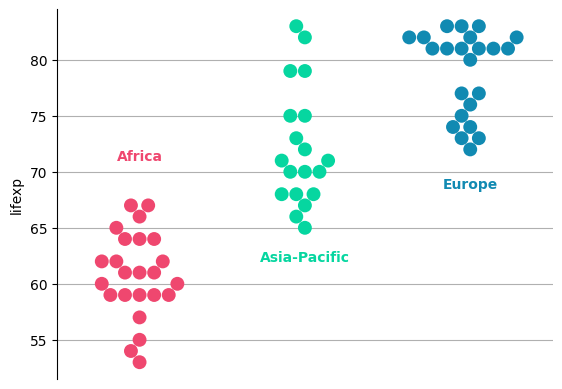

In [46]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/footprint/footprint.csv"
df = pd.read_csv(url)
df = df[df["region"].isin(
   ["Africa", "EU-27", "Asia-Pacific"]
)]

x = df["region"]
y = df["lifexp"]

colors = ["#ef476f", "#06d6a0", "#118ab2"]

fig, ax = plt.subplots()

sns.swarmplot(
  x=x, y=y, hue=x,
  palette=colors,
  size=10,
  ax=ax
)
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.grid(axis="y")
ax.set_xlabel("")
ax.set_xticks([])

text_arg = dict(weight="bold", ha="center")
ax.text(x=0, y=71, s="Africa", color=colors[0], **text_arg)
ax.text(x=1, y=62, s="Asia-Pacific", color=colors[1], **text_arg)
ax.text(x=2, y=68.5, s="Europe", color=colors[2], **text_arg)
plt.show()

## Title and Text

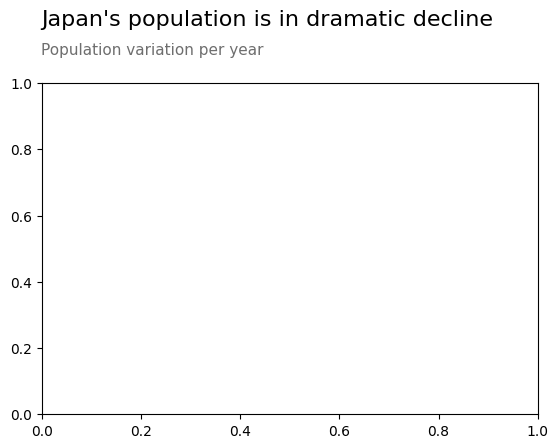

In [47]:
fig, ax = plt.subplots()

# Adjust top margin
fig.subplots_adjust(top=0.8)
# This function is necessary to create space above the chart for the title. 
# In this case, setting top=0.8 means that the chart will occupy only 80% of the figure’s height, leaving room for the title.

# Title
fig.text(
  x=.124,
  y=.92,
  s="Japan's population is in dramatic decline",
  size=16,
)

# Subtitle
fig.text(
  x=.124,
  y=.86,
  s="Population variation per year",
  size=11,
  color="#6E6E6E"
)

plt.show()

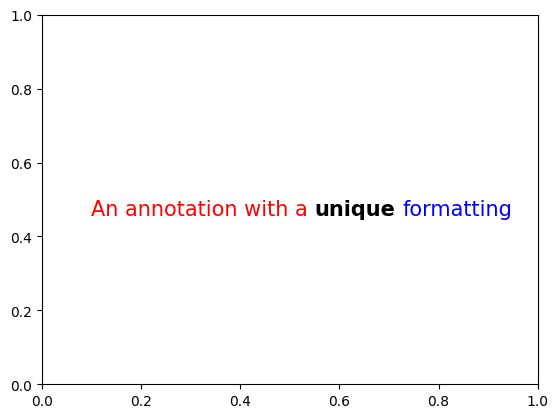

In [48]:
fig, ax = plt.subplots()

ax_text(
  x=0.1, y=0.5,
  s="An annotation with a <unique> <formatting>",
  color="red",
  ax=ax, size=15,
  highlight_textprops=[
    {"color": "black", "weight": "bold"},
    {"color": "blue"},
  ],
)

plt.show()

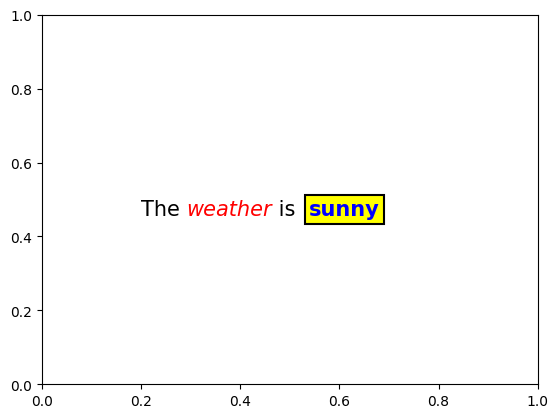

In [49]:
fig, ax = plt.subplots()

ax_text(
    x=0.2,
    y=0.5,
    s="The <weather> is  <sunny>",
    ax=ax, size=15,
    highlight_textprops=[
      {"style": "italic", "color": "red"},
      {
      "color": "blue",
      "weight": "bold",
      "bbox": {
          "edgecolor": "black", # border color
          "facecolor": "yellow", # background color
          "linewidth": 1.5, # border width
          "pad": 3, # padding
      }
}])

plt.show()

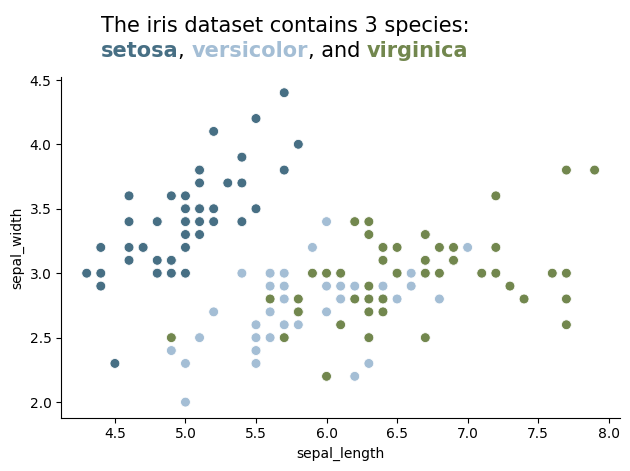

In [50]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/refs/heads/master/static/data/iris.csv"
iris = pd.read_csv(url)

colors = ["#476F84", "#A4BED5", "#72874E"]

x = iris["sepal_length"]
y = iris["sepal_width"]
c = iris["species"]

fig, ax = plt.subplots(layout="tight")
ax.spines[["top", "right"]].set_visible(False)
sns.scatterplot(
  x=x, y=y, hue=c, s=50, legend=False, palette=colors,
)

text = "The iris dataset contains 3 species:\n<setosa>, <versicolor>, and <virginica>"
ax_text(
    x=4.4, y=5, s=text,
    fontsize=15, color='black',
    highlight_textprops=[
      {"color": colors[0], 'fontweight': 'bold'},
      {"color": colors[1], 'fontweight': 'bold'},
      {"color": colors[2], 'fontweight': 'bold'}
    ],
)
plt.show()

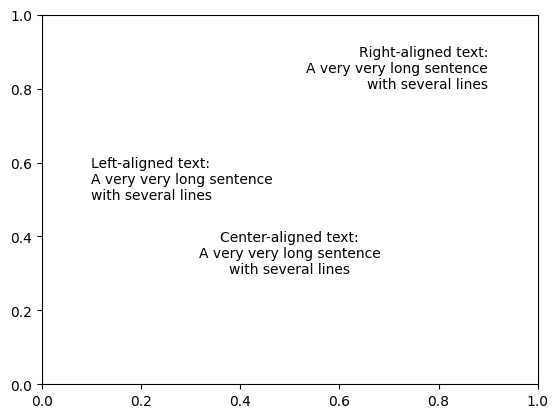

In [51]:
fig, ax = plt.subplots()

ax.text(
  x=0.1, y=0.5,
  s="Left-aligned text:\nA very very long sentence\nwith several lines",
  ha="left"  # explicitly setting left alignment
)

ax.text(
  x=0.5, y=0.3,
  s="Center-aligned text:\nA very very long sentence\nwith several lines",
  ha="center"  # horizontally centered alignment
)

ax.text(
  x=0.9, y=0.8,
  s="Right-aligned text:\nA very very long sentence\nwith several lines",
  ha="right"  # horizontally right-aligned
)

plt.show()

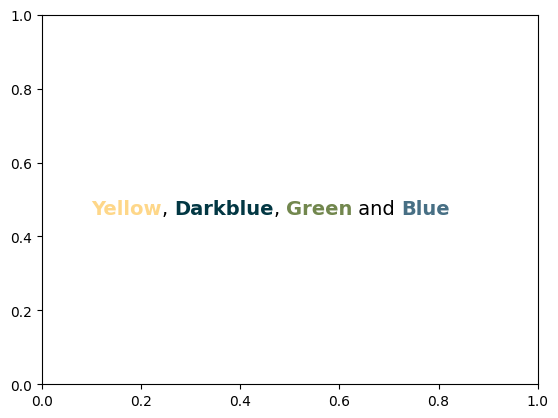

In [52]:
data = np.random.randn(20, 20)
cmap = load_cmap("Acadia")

fig, ax = plt.subplots()

ax_text(
    x=0.1,
    y=0.5,
    s="<Yellow>, <Darkblue>, <Green> and <Blue>",
    size=14,
    highlight_textprops=[
        {"color": cmap(0), "weight": "bold"},
        {"color": cmap(1), "weight": "bold"},
        {"color": cmap(2), "weight": "bold"},
        {"color": cmap(3), "weight": "bold"},
    ],
)
plt.show()

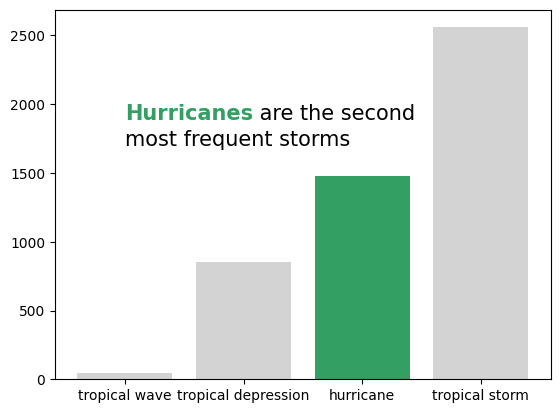

In [53]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/storms/storms.csv"
storms = pd.read_csv(url)
df = storms.groupby("status", as_index=False)["n"].sum()
df = df.sort_values("n")

labels = df["status"]
y = df["n"]

color_mapping = {
  True: "#339f62",
  False: "lightgrey"
}
colors = (df["status"] == "hurricane").map(color_mapping)

fig, ax = plt.subplots()
ax.bar(labels, y, color=colors)

ax_text(
    x=0,
    y=2000,
    s="<Hurricanes> are the second\nmost frequent storms",
    size=15,
    highlight_textprops=[{"color": "#339f62", "weight": "bold"}],
)
plt.show()

# Arrow

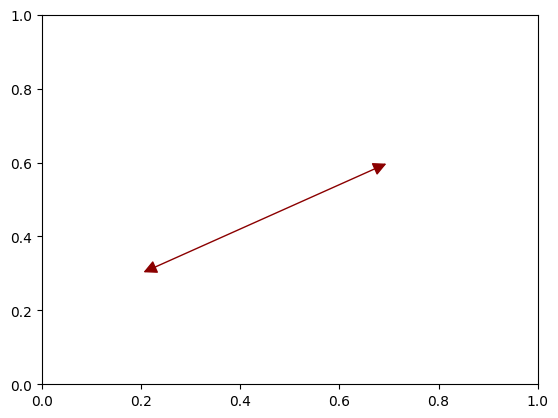

In [54]:
fig, ax = plt.subplots()
ax_arrow(
   tail_position=[0.2, 0.3],
   head_position=[0.7, 0.6],
   color="darkred",
   double_headed=True,
   fill_head=True,
   ax=ax,
)
plt.show()

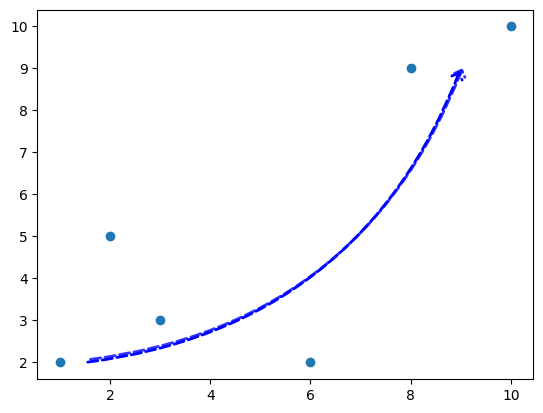

In [55]:
fig, ax = plt.subplots()
ax.scatter([1, 2, 3, 8, 6, 10], [2, 5, 3, 9, 2, 10])

ax_arrow(
   tail_position=[1.5, 2],
   head_position=[9, 9],
   color="#0000FF",
   width=2,
   double_headed=False,
   fill_head=False,
   head_width=4,
   head_length=4,
   radius=0.3, # makes it a curve instead of a straight line
   linestyle="dashed",
   ax=ax,
   shadow_style={
    'shadow_color': '#0000FF',
    'offset': (2,2),
    'alpha': 0.8
    },
)
plt.show()

# Multiple axes

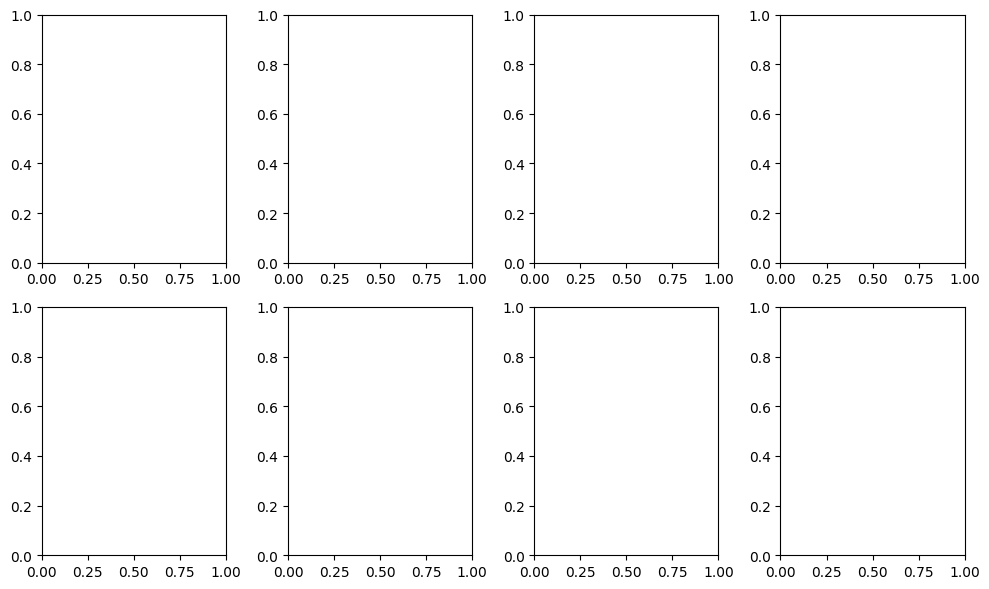

In [56]:
fig, axs = plt.subplots(
   nrows=2,
   ncols=4,
   figsize=(10, 6),
   layout="tight"
)

plt.show()

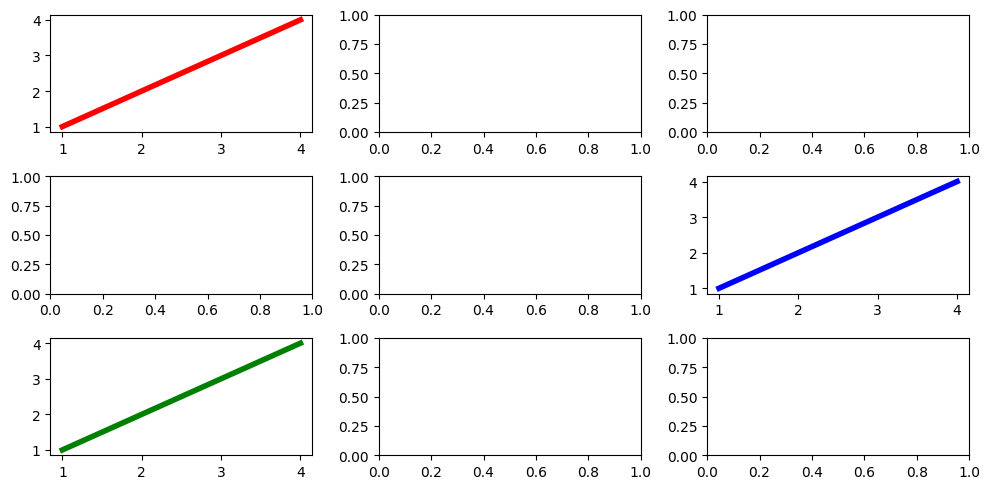

In [57]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

fig, axs = plt.subplots(
   ncols=3,
   nrows=3,
   figsize=(10, 5),
   layout="tight"
)

axs[0, 0].plot(x, y, color="red", linewidth=4)
axs[1, 2].plot(x, y, color="blue", linewidth=4)
axs[2, 0].plot(x, y, color="green", linewidth=4)

plt.show()

Text(0.3, 0.5, 'Hello there')

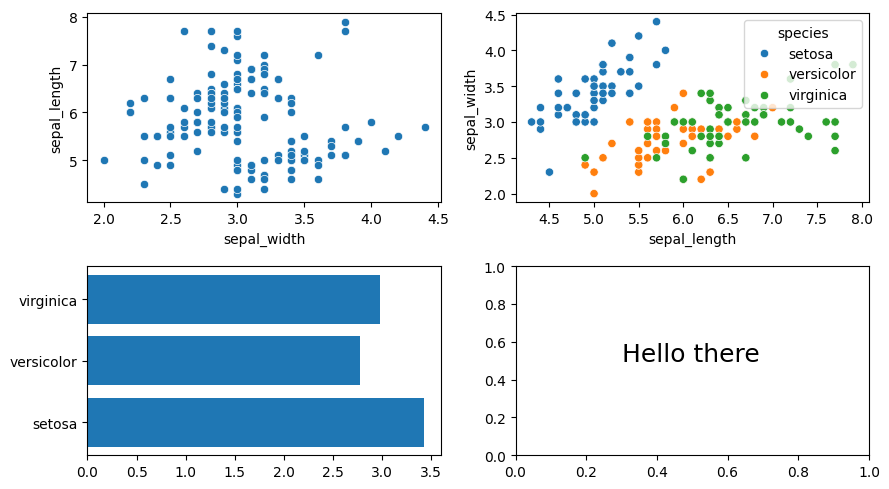

In [58]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/refs/heads/master/static/data/iris.csv"
iris = pd.read_csv(url)

fig, axs = plt.subplots(
   ncols=2,
   nrows=2,
   figsize=(9, 5),
   layout="tight"
)

x = iris["sepal_width"]
y = iris["sepal_length"]
c = iris["species"]

agg = iris.groupby("species", as_index=False)[
   "sepal_width"
].mean()

sns.scatterplot(x=x, y=y, ax=axs[0, 0])
sns.scatterplot(x=y, y=x, hue=c, ax=axs[0, 1])
axs[1, 0].barh(agg["species"], agg["sepal_width"])
axs[1, 1].text(
   x=0.3, y=0.5, s="Hello there", size=18
)

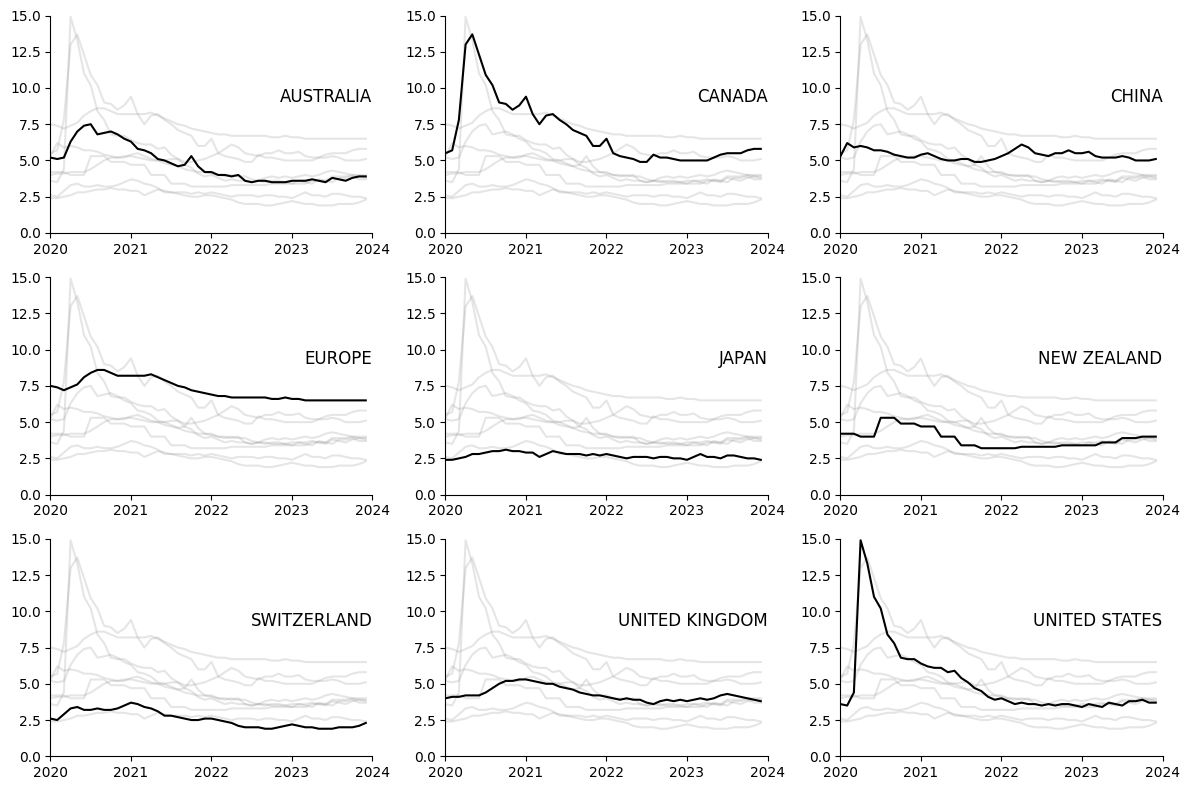

In [59]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/economic/economic.csv"
df = pd.read_csv(url)

fig, axs = plt.subplots(
   nrows=3, ncols=3,
   figsize=(12, 8),
   layout="tight"
)

# list of all country names
countries = df["country"].unique()

for country, ax in zip(countries, axs.flat):

   # draw other lines in the background
   other_df = df[df["country"] != country]
   for other_country in other_df["country"].unique():
      x = other_df.loc[other_df["country"] == other_country, "date"]
      y = other_df.loc[other_df["country"] == other_country, "unemployment rate"]
      ax.plot(x, y, alpha=0.2, color="grey")

   x = df.loc[df["country"] == country, "date"]
   y = df.loc[df["country"] == country, "unemployment rate"]

   ax.plot(x, y, color="black")
   ax.set_ylim(0, 15)
   ax.set_xlim("2020-01-01", "2024-01-01")
   ax.spines[["top", "right"]].set_visible(False)
   ax.set_xticks(
      ["2020-01-01", "2021-01-01", "2022-01-01", "2023-01-01", "2024-01-01"],
      labels=[2020, 2021, 2022, 2023, 2024]
   )
   ax.text(
      x="2024-01-01", y=9,
      s=country.upper(), # upper case
      ha="right",
      size=12,
   )

plt.show()

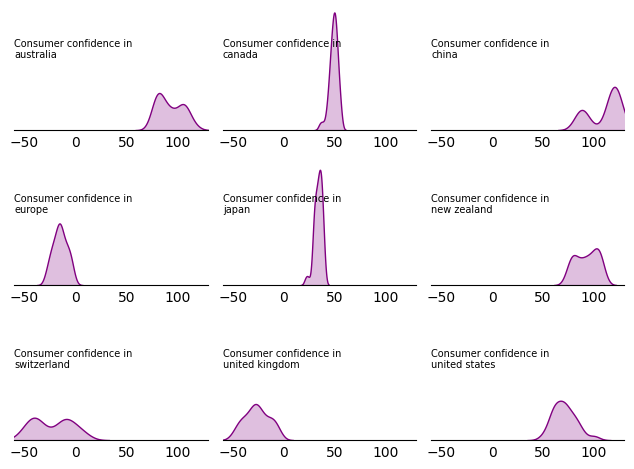

In [60]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/economic/economic.csv"
df = pd.read_csv(url)

fig, axs = plt.subplots(
    ncols=3, nrows=3, layout="tight"
)

for country, ax in zip(df["country"].unique(), axs.flat):
    x = df.loc[df["country"] == country, "consumer confidence"]
    sns.kdeplot(x, fill=True, color="purple", ax=ax)
    ax.set_yticks([])
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.spines[["top", "left", "right"]].set_visible(False)
    ax.set_xlim(-60, 130)
    ax.set_ylim(0, 0.1)
    ax.tick_params(length=0)
    ax.text(
        x=-60, y=0.06,
        s=f"Consumer confidence in\n{country}",
        size=7
    )
plt.show()

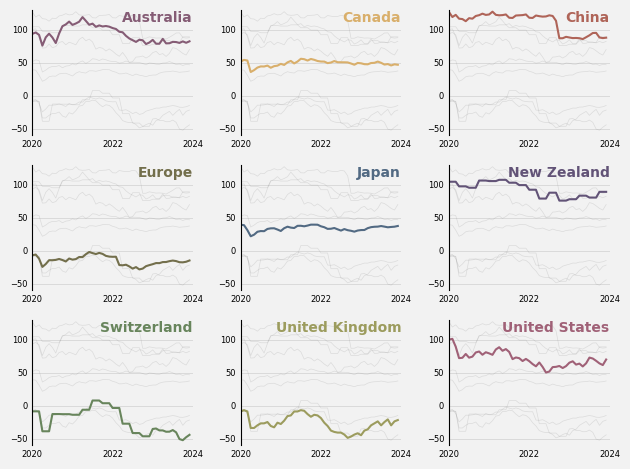

In [61]:
from drawarrow import ax_arrow, fig_arrow
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from matplotlib.patches import PathPatch
import matplotlib.patheffects as path_effects


url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/economic/economic.csv"
df = pd.read_csv(url)

colors = load_cmap("Antique").colors
background_color = "#f2f2f2"

fig, axs = plt.subplots(
    ncols=3, nrows=3, layout="tight"
)
fig.set_facecolor(background_color)

for color, country, ax in zip(colors, df["country"].unique(), axs.flat):
    
    other_df = df[df["country"] != country]
    for other_country in other_df["country"].unique():
        x = other_df.loc[other_df["country"] == other_country, "date"]
        y = other_df.loc[other_df["country"] == other_country, "consumer confidence"]
        ax.plot(x, y, alpha=0.2, color="grey", linewidth=0.5)

    x = df.loc[df["country"] == country, "date"]
    y = df.loc[df["country"] == country, "consumer confidence"]
    ax.plot(x, y, color=color)
    ax.set_ylim(-60, 130)
    ax.set_xlim("2020-01-01", "2024-01-01")
    ax.set_xticks(["2020-01-01", "2022-01-01", "2024-01-01"], labels=[2020, 2022, 2024])
    ax.text(
        x="2024-01-01", y=112, s=country.title(), ha="right", color=color, weight="bold"
    )
    ax.spines[["top", "right", "bottom"]].set_visible(False)
    ax.tick_params(length=0, labelsize=6)
    ax.grid(axis="y", linewidth=0.5, alpha=0.5)
    ax.set_facecolor(background_color)

plt.show()

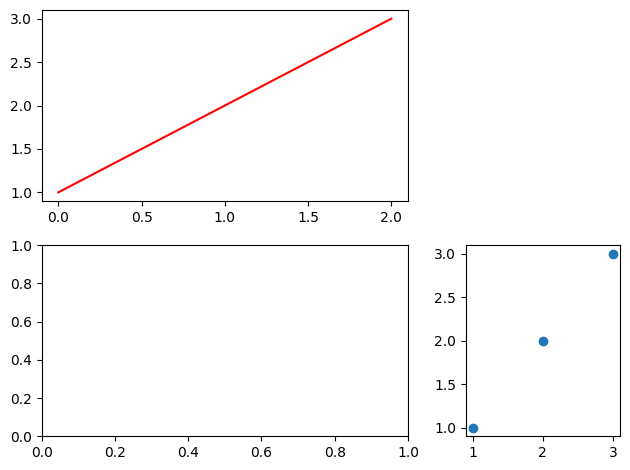

In [62]:
scheme = """
AA.
BBC
"""
fig, axs = plt.subplot_mosaic(scheme, layout="tight")

axs["A"].plot([1, 2, 3], color="red")
axs["C"].scatter([1, 2, 3], [1, 2, 3])

plt.show()

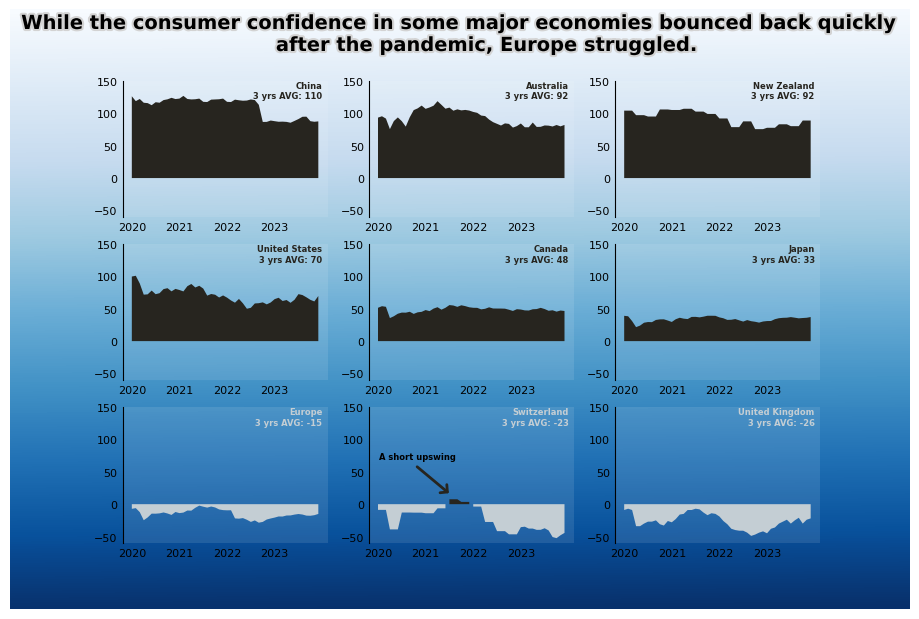

In [63]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/economic/economic.csv"
df = pd.read_csv(url)

avg_cc_df = (df.groupby(["country"]).agg(avg_cc=("consumer confidence", "mean"))
             .reset_index())  
avg_cc_df = avg_cc_df.sort_values(by=["avg_cc"], ascending=False, ignore_index=True)
df1 = df.merge(avg_cc_df, on="country", how="left")

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 6))

for ax in axs.flat:
    ax.patch.set_alpha(0.1)  

bg = np.linspace(0, 1, 10000).reshape(100, 100)  
bg_ax = fig.add_axes([0, 0, 1, 1], zorder=-1)  
bg_ax.imshow(bg, cmap=plt.cm.Blues, interpolation='bicubic',
             extent=[-0.05, 1.05, -0.05, 1.05], aspect="auto")
bg_ax.set_xlim(-0.05, 1.05)
bg_ax.set_ylim(-0.05, 1.05)
bg_ax.axis("off")

countries = avg_cc_df["country"].unique()

for country, ax in zip(countries, axs.flat):
    subset = df1[df1["country"] == country]
    x = subset["date"]
    h = subset["consumer confidence"]
    v = subset["avg_cc"].unique().astype(int)
    ax.fill_between(x, h, where=h>=0, facecolor="#27251F")
    ax.fill_between(x, h, where=h<0, facecolor="#C4CED4")
    c = "#27251F" if v.item() > 0 else "#C4CED4"
    ax.text(x="2023-12-31", y=123, s=f"{country.title()}\n3 yrs AVG: {v.item()}",
            color=c, size=6, weight="bold", ha="right")
    ax.set_ylim(-60, 150)
    location = ["2020-01-01", "2021-01-01", "2022-01-01", "2023-01-01"]
    labels = ["2020", "2021", "2022", "2023"]
    ax.set_xticks(location, labels=labels)
    ax.tick_params(length=0, labelsize=8)
    ax.spines[["top", "bottom", "right"]].set_visible(False)

fig_arrow(
   tail_position=[0.45, 0.24],
   head_position=[0.49, 0.19],
   color="#27251F",
   width=2,
   fill_head=False,
   head_width=3.8,
   head_length=3.7   
)

fig.text(0.41, 0.25, "A short upswing", size=6, weight="bold")

txt='''While the consumer confidence in some major economies bounced back quickly
        after the pandemic, Europe struggled.''' 

t = fig.text(0.5, 0.93, s=txt, ha="center", size=14, weight="bold")
t.set_path_effects([path_effects.Stroke(linewidth=3, foreground="lightgrey"),
                       path_effects.Normal()])
    
plt.show()

# Maps

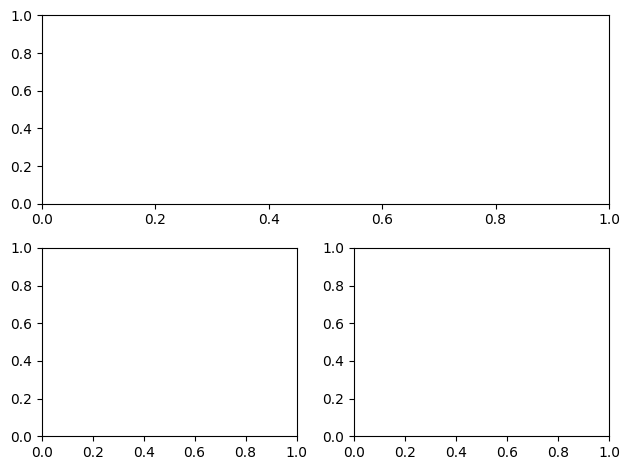

In [64]:
scheme = """
AA
BC
"""

fig, axs = plt.subplot_mosaic(scheme, layout="tight")

plt.show()

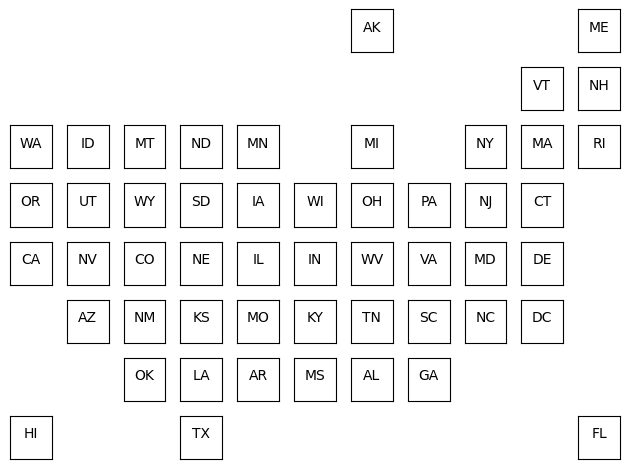

In [65]:
scheme = [
    [".", ".", ".", ".", ".", ".", "AK", ".", ".", ".", "ME"],
    [".", ".", ".", ".", ".", ".", ".", ".", ".", "VT", "NH"],
    ["WA", "ID", "MT", "ND", "MN", ".", "MI", ".", "NY", "MA", "RI"],
    ["OR", "UT", "WY", "SD", "IA", "WI", "OH", "PA", "NJ", "CT", "."],
    ["CA", "NV", "CO", "NE", "IL", "IN", "WV", "VA", "MD", "DE", "."],
    [".", "AZ", "NM", "KS", "MO", "KY", "TN", "SC", "NC", "DC", "."],
    [".", ".", "OK", "LA", "AR", "MS", "AL", "GA", ".", ".", "."],
    ["HI", ".", ".", "TX", ".", ".", ".", ".", ".", ".", "FL"],
]

fig, axs = plt.subplot_mosaic(scheme, layout="tight")

# The way we iterate on the axes is
# a bit different than usual
for ax in axs:
    axs[ax].set_xticks([])
    axs[ax].set_yticks([])
    axs[ax].text(x=0.5, y=0.5, s=ax, ha="center")

plt.show()

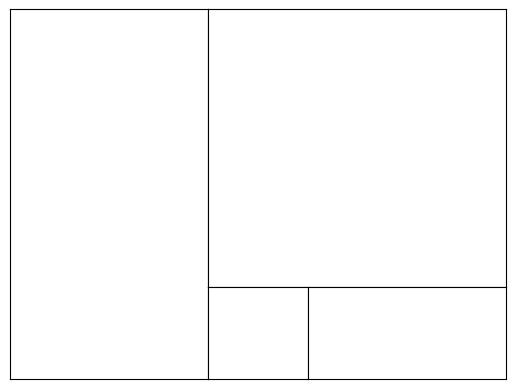

In [66]:
scheme = """
AABBB
AABBB
AABBB
AACDD
"""

fig, axs = plt.subplot_mosaic(scheme)
fig.subplots_adjust(wspace=0, hspace=0)

for ax in axs:
    axs[ax].set_xticks([])
    axs[ax].set_yticks([])

plt.show()

# Insert any Axes

## Creating Child Axes

The first two numbers define the x and y position, while the next two set the width and height.

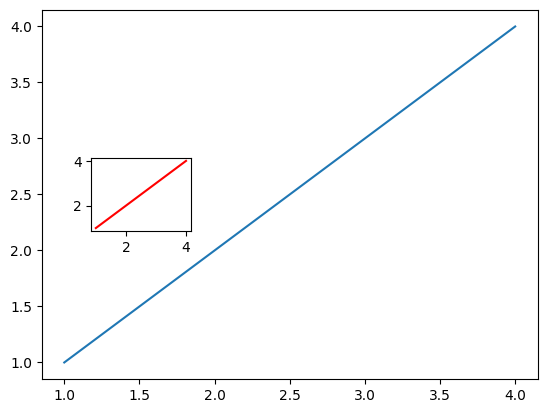

In [67]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

fig, ax = plt.subplots()

ax.plot(x, y)

child_ax = ax.inset_axes([0.1, 0.4, 0.2, 0.2])
child_ax.plot(x, y, color="red")

plt.show()

(np.float64(-0.5), np.float64(544.5), np.float64(487.5), np.float64(-0.5))

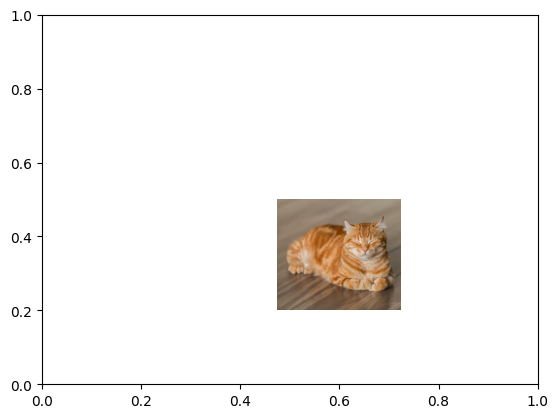

In [68]:
# read the image and transform into an array
img_url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/misc/cat.png"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
img = np.array(img)

fig, ax = plt.subplots()

child_ax = ax.inset_axes([0.4, 0.2, 0.4, 0.3])

child_ax.imshow(img)
child_ax.axis("off")



(np.float64(-0.5), np.float64(1779.5), np.float64(1522.5), np.float64(-0.5))

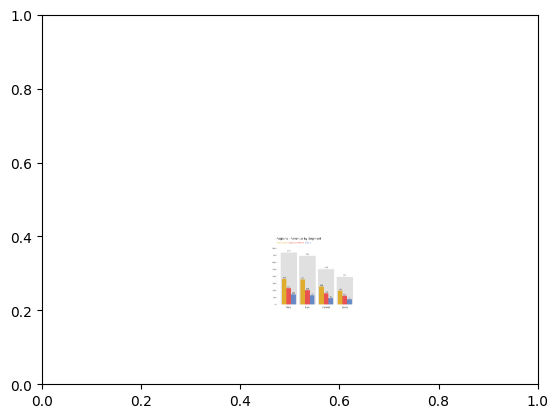

In [69]:
# if image is local, you can use:
fig, ax = plt.subplots()

child_ax = ax.inset_axes([0.4, 0.2, 0.3, 0.2])

img = Image.open("../../output/grouped-barplot-with-the-total-of-each-group-represented-as-a-grey-rectangle.png")
child_ax.imshow(img)
child_ax.axis("off")

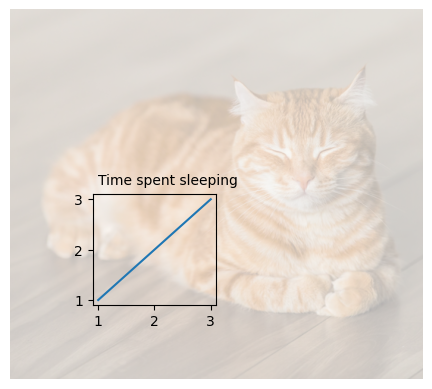

In [70]:
img_url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/misc/cat.png"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
img = np.array(img)

fig, ax = plt.subplots()
ax.imshow(img, alpha=0.3)
ax.axis("off")

child_ax = ax.inset_axes([0.2, 0.2, 0.3, 0.3])
child_ax.plot([1, 2, 3], [1, 2, 3])
child_ax.text(x=1, y=3.3, s="Time spent sleeping")
child_ax.patch.set_alpha(0)  # make the background transparent

plt.show()

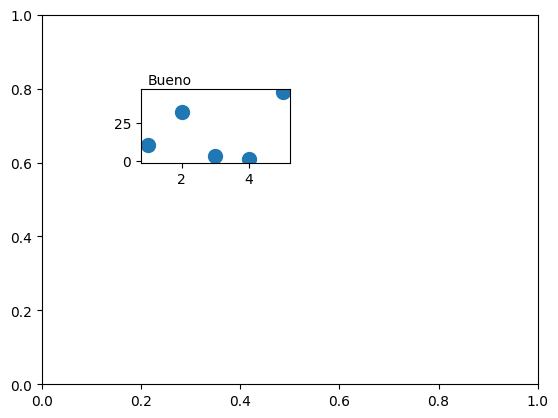

In [71]:
x = [1, 2, 3, 4, 5]
y = [10, 32, 3, 1, 45]

fig, ax = plt.subplots()

child_ax = ax.inset_axes([0.2, 0.6, 0.3, 0.2])
child_ax.scatter(x, y, s=100)
child_ax.text(x=1, y=50, s="Bueno")

plt.show()

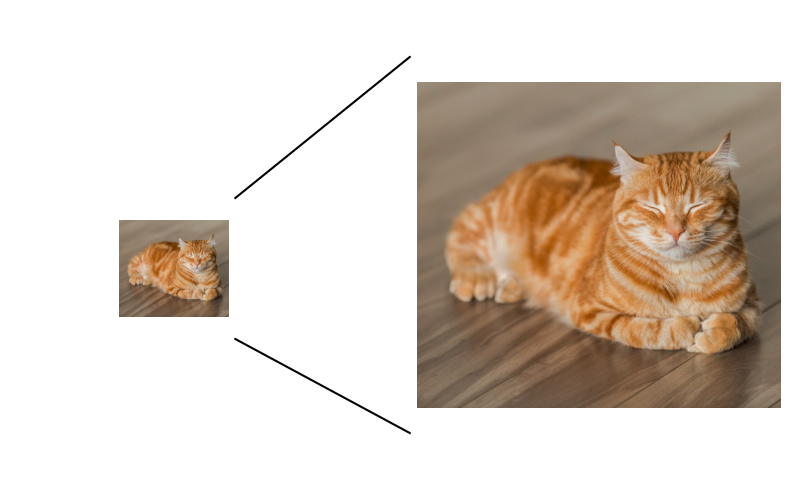

In [72]:
img_url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/misc/cat.png"
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
img = np.array(img)

fig, axs = plt.subplots(
    ncols=2,
    figsize=(8, 5),
    layout="tight"
)

axs[1].imshow(img)
child_ax = axs[0].inset_axes([0.3, 0.3, 0.3, 0.3])
child_ax.imshow(img)

child_ax.axis("off")
axs[0].axis("off")
axs[1].axis("off")
axs[0].plot([0.62, 1.1], [0.6, 0.9], color="black", clip_on=False)
axs[0].plot([0.62, 1.1], [0.3, 0.1], color="black", clip_on=False)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

plt.show()

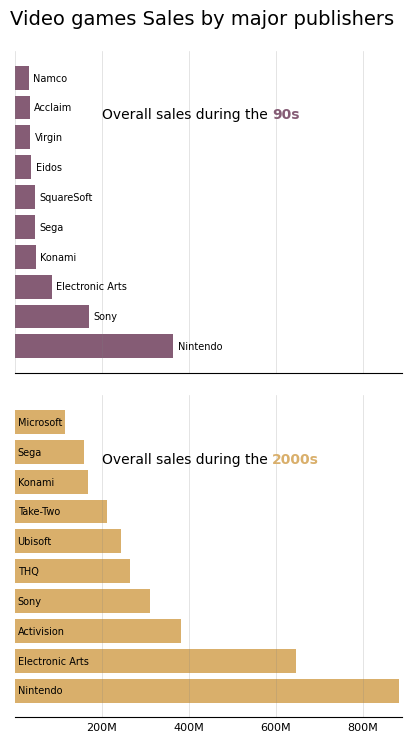

In [73]:
# Data processing
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/game-sales/game-sales.csv"
df = pd.read_csv(url)
df = df.replace({
  "Konami Digital Entertainment": "Konami",
  "Take-Two Interactive": "Take-Two",
  "Sony Computer Entertainment": "Sony",
  "Microsoft Game Studios": "Microsoft",
  "Virgin Interactive": "Virgin",
  "Eidos Interactive": "Eidos",
  "Acclaim Entertainment": "Acclaim",
  "Namco Bandai Games": "Namco",
})
df2000 = df[(df["Year"] >= 2000) & (df["Year"] < 2010)]
df2000 = (
  df2000.groupby("Publisher", as_index=False)["Global_Sales"]
  .sum()
  .sort_values("Global_Sales", ascending=False)[:10]
  .reset_index()
  .drop("index", axis=1)
)
df1990 = df[(df["Year"] >= 1990) & (df["Year"] < 2000)]
df1990 = (
  df1990.groupby("Publisher", as_index=False)["Global_Sales"]
  .sum()
  .sort_values("Global_Sales", ascending=False)[:10]
  .reset_index()
  .drop("index", axis=1)
)

# Plot
colors = load_cmap("Antique").colors
col1, col2 = colors[0], colors[1]

fig, axs = plt.subplots(nrows=2, figsize=(5, 9))
fig.subplots_adjust(hspace=0.07, top=0.85)

axs[0].barh(df1990["Publisher"], df1990["Global_Sales"], color=col1)
axs[0].set_xticks([0, 200, 400, 600, 800], labels=["", "", "", "", ""])
ax_text(
  x=200,
  y=8,
  s="Overall sales during the <90s>",
  ax=axs[0],
  highlight_textprops=[{"color": col1, "weight": "bold"}],
)

axs[1].barh(df2000["Publisher"], df2000["Global_Sales"], color=col2)
axs[1].set_xticks([200, 400, 600, 800], labels=["200M", "400M", "600M", "800M"], size=8)
ax_text(
  x=200,
  y=8,
  s="Overall sales during the <2000s>",
  ax=axs[1],
  highlight_textprops=[{"color": col2, "weight": "bold"}],
)

for ax in axs:
  ax.set_xlim(0, 890)
  ax.spines[["top", "right", "left"]].set_visible(False)
  ax.grid(axis="x", color="grey", lw=0.5, alpha=0.3, zorder=-1)
  ax.tick_params(length=0)
  ax.set_yticks([])

for i, row in df1990.iterrows():
  company = row["Publisher"]
  value = row["Global_Sales"]
  axs[0].text(x=value + 10, y=i, s=company, va="center", size=7)

for i, row in df2000.iterrows():
  company = row["Publisher"]
  axs[1].text(x=7, y=i, s=company, va="center", size=7)

fig.text(x=0.5, y=0.88, s="Video games Sales by major publishers", ha="center", size=14)
plt.savefig("../../output/video_games_sales.png", dpi=300, bbox_inches="tight")

plt.show()

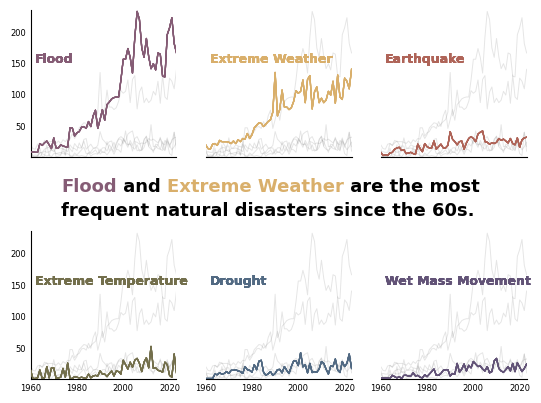

In [74]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/natural-disasters/natural-disasters.csv"
df = pd.read_csv(url)
df = df.drop(columns=["Volcanic activity", "Wildfire"])

colors = load_cmap("Antique").colors

events = [
    "Flood",
    "Extreme weather",
    "Earthquake",
    "Extreme temperature",
    "Drought",
    "Wet mass movement",
]

fig, axs = plt.subplots(ncols=3, nrows=2)
fig.subplots_adjust(hspace=0.5)

for ax, event, color in zip(axs.flat, events, colors):
  for sub_event in events:
    ax.plot(
      df["Year"], df[sub_event], color="grey", alpha=0.2, zorder=1, linewidth=0.7
      )
    
    ax.plot(df["Year"], df[event], color=color, zorder=5, linewidth=0.9)
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=6)
    ax.set_ylim(0, 235)
    ax.set_xlim(1960, 2023)
    ax.text(x=1962, y=150, s=event.title(), size=9, color=color, weight="bold")
    
    if event not in ["Flood", "Extreme temperature"]:
      ax.spines["left"].set_visible(False)
      ax.set_yticks([])
    else:
      ax.set_yticks([50, 100, 150, 200])
    
    if event not in ["Extreme temperature", "Drought", "Wet mass movement"]:
      ax.set_xticks([])
  
fig_text(
    x=0.5,
    y=0.53,
    s="<Flood> and <Extreme Weather> are the most\nfrequent natural disasters since the 60s.",
    size=13,
    weight="bold",
    ha="center",
    highlight_textprops=[
        {"color": colors[0]},
        {"color": colors[1]},
    ],
)
plt.savefig("../../output/natural_disasters.png", dpi=300, bbox_inches="tight")

plt.show()

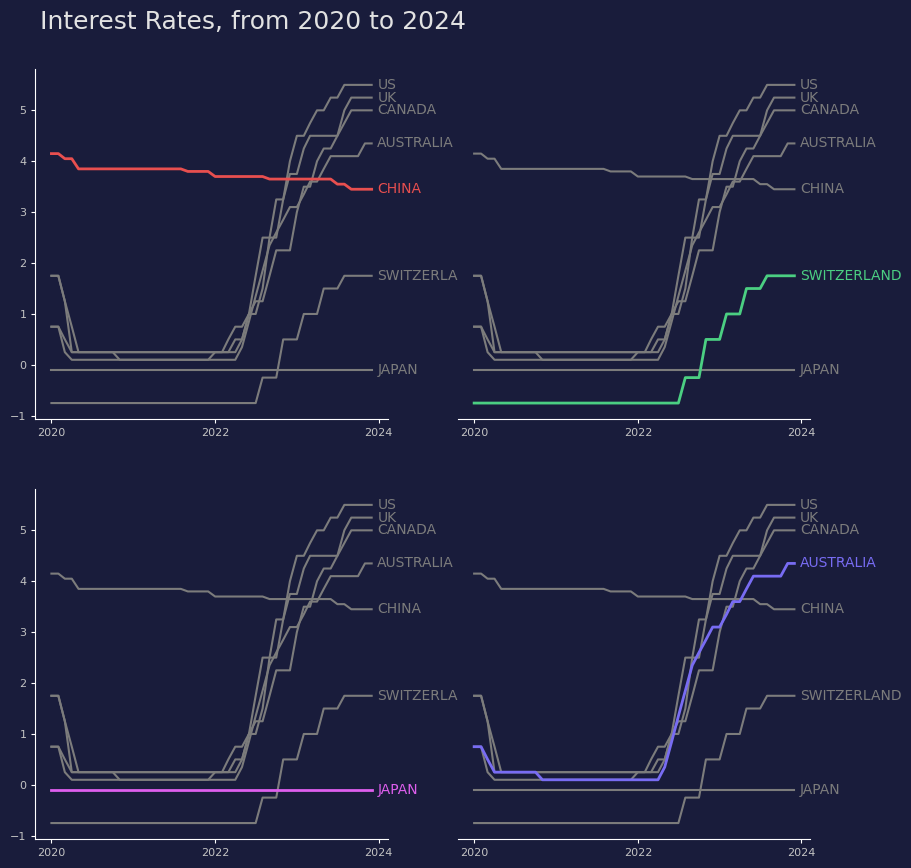

In [75]:
url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/economic/economic.csv"
df = pd.read_csv(url)
df = df[~df["country"].isin(["europe", "new zealand"])]
df["country"] = df["country"].replace({"united states": "US", "united kingdom": "UK"})
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

grey_lines_color = "#7c7c7c"
background_color = "#191c3b"
color_mapping = {
  "china": "#e84f4f",
  "switzerland": "#4bcf82",
  "japan": "#de5fee",
  "australia": "#786cf3",
}

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
fig.set_facecolor(background_color)

# for each Axes
for ax in axs.flat:
  # for each country
  for country in df["country"].unique():
    # retrieve x and y values
    subset = df[df["country"] == country]
    x = subset["date"]
    y = subset["interest rates"]

    # retrieve last date/value
    last_date = x.values[-1] + pd.Timedelta(days=25)
    last_value = y.values[-1]

    # plot china on the top left Axes
    if country == "china" and ax == axs[0, 0]:
      text_style = dict(color=color_mapping[country])
      plot_style = dict(zorder=5, linewidth=2, color=color_mapping[country])

    # plot switzerland on the top right Axes
    elif country == "switzerland" and ax == axs[0, 1]:
      text_style = dict(color=color_mapping[country])
      plot_style = dict(zorder=5, linewidth=2, color=color_mapping[country])

    # plot japan on the bottom left Axes
    elif country == "japan" and ax == axs[1, 0]:
      text_style = dict(color=color_mapping[country])
      plot_style = dict(zorder=5, linewidth=2, color=color_mapping[country])

    # plot australia on the bottom right Axes
    elif country == "australia" and ax == axs[1, 1]:
      text_style = dict(color=color_mapping[country])
      plot_style = dict(zorder=5, linewidth=2, color=color_mapping[country])

    # all other countries in light gray
    else:
      text_style = dict(color=grey_lines_color)
      plot_style = dict(color=grey_lines_color)

    ax.plot(x, y, **plot_style)
    ax.text(
      x=last_date,
      y=last_value,
      s=country.upper(),
      va="center",
      **text_style,
    )

    ax.set_xticks(["2020-01-01", "2022-01-01", "2024-01-01"], labels=[2020, 2022, 2024])
    ax.tick_params(length=3, labelcolor="#c3c3c3", labelsize=8, color="white")
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["top", "right", "left", "bottom"]].set_color("white")
    ax.set_facecolor(background_color)

axs[0, 1].spines["left"].set_visible(False)
axs[1, 1].spines["left"].set_visible(False)
axs[0, 1].set_yticks([])
axs[1, 1].set_yticks([])

fig.text(
  x=0.13, y=0.92, s="Interest Rates, from 2020 to 2024",
  size=18, color="#e2e2e2"
)
#plt.savefig("../../output/interest_rates.png", dpi=300, bbox_inches="tight")
plt.show()